# Chicago Crime Type Count Prediction for following Year

## goal: predict the crime type count for following year

In [1]:
import wrangle as w
import pandas as pd
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sqlalchemy import text, create_engine
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt 
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display, HTML

In [2]:
train, validate, test = w.wrangle_crime()





In [3]:
train

Primary Type,THEFT,BATTERY,ASSAULT,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,NARCOTICS,HOMICIDE,HUMAN TRAFFICKING,OFFENSE INVOLVING CHILDREN,KIDNAPPING
Date,,,,,,,,,,
2018-08-04,176,108,46,47,17,22,2,0,4,0
2018-08-05,223,199,77,97,20,18,8,0,4,2
2018-08-06,215,130,52,74,26,35,3,0,7,0
2018-08-07,232,122,46,69,36,32,2,0,5,0
2018-08-08,222,125,63,69,25,33,4,0,4,0
...,...,...,...,...,...,...,...,...,...,...
2021-07-14,102,102,59,80,27,7,2,0,4,0
2021-07-15,109,106,50,57,18,8,3,0,3,1
2021-07-16,128,117,68,86,35,7,2,0,4,0


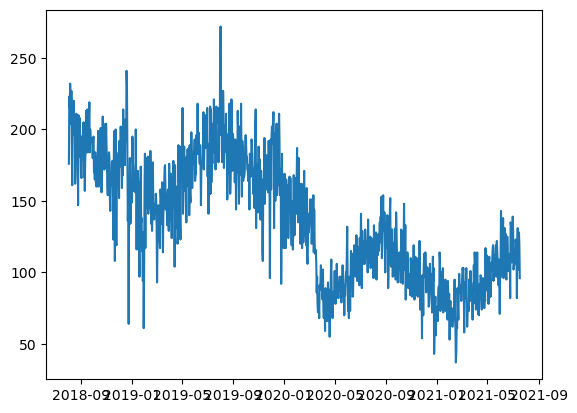

In [4]:
plt.plot(train.index, train.THEFT)


In [5]:
y = train.THEFT

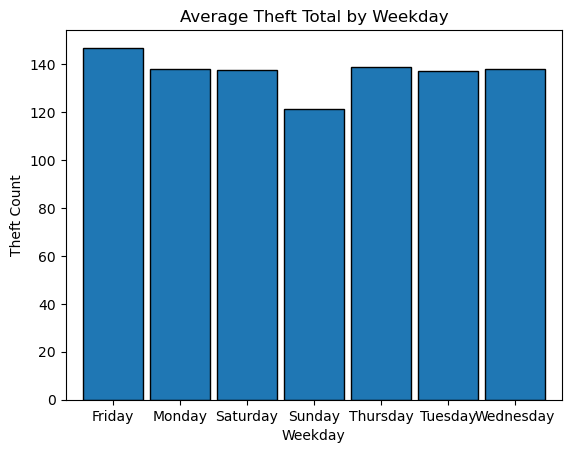

In [6]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Theft Total by Weekday', xlabel='Weekday', ylabel='Theft Count')
plt.show()

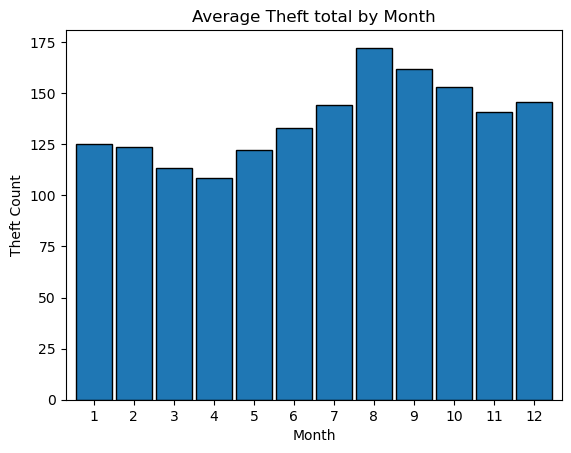

In [7]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Theft total by Month', xlabel='Month', ylabel='Theft Count')
plt.show()

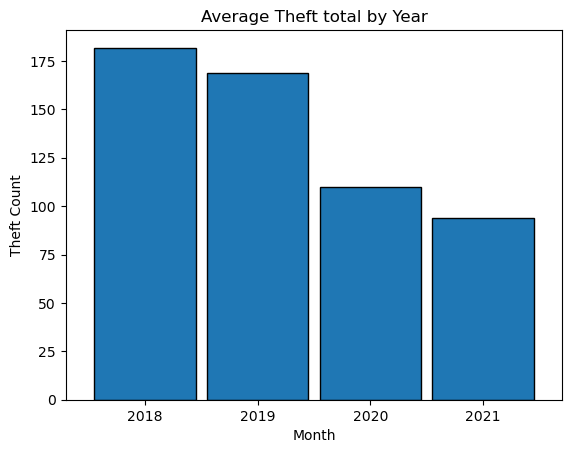

In [8]:
ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Theft total by Year', xlabel='Month', ylabel='Theft Count')
plt.show()

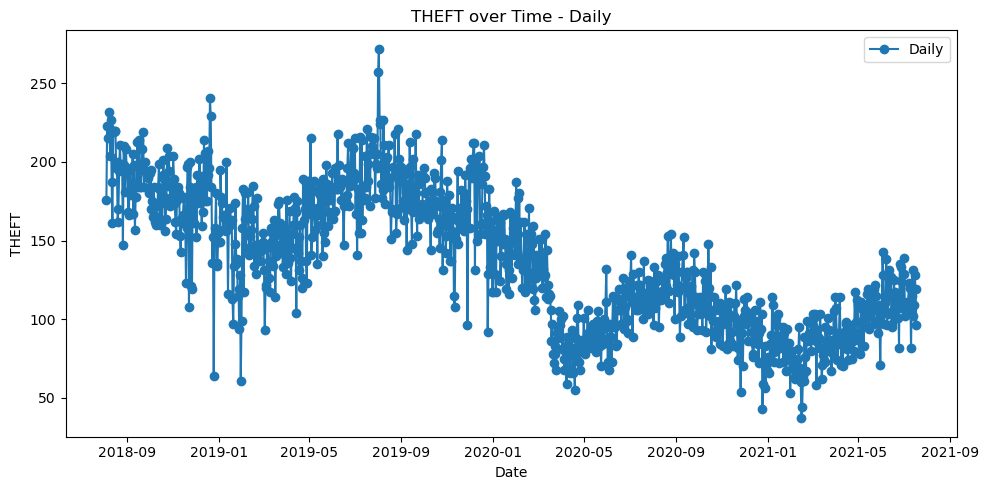

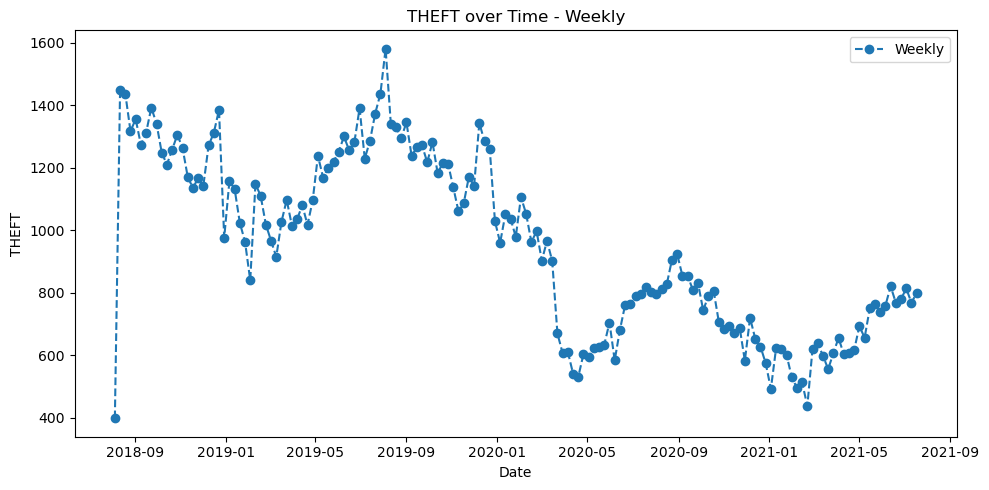

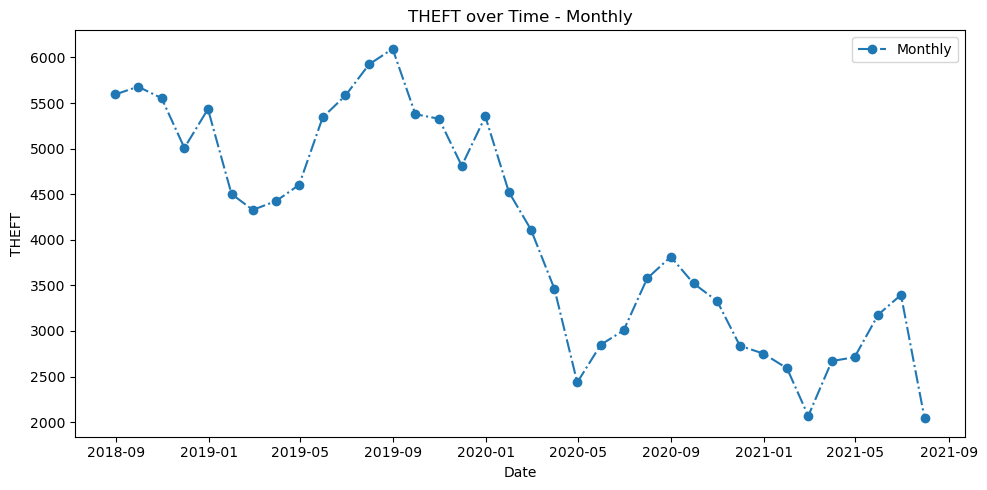

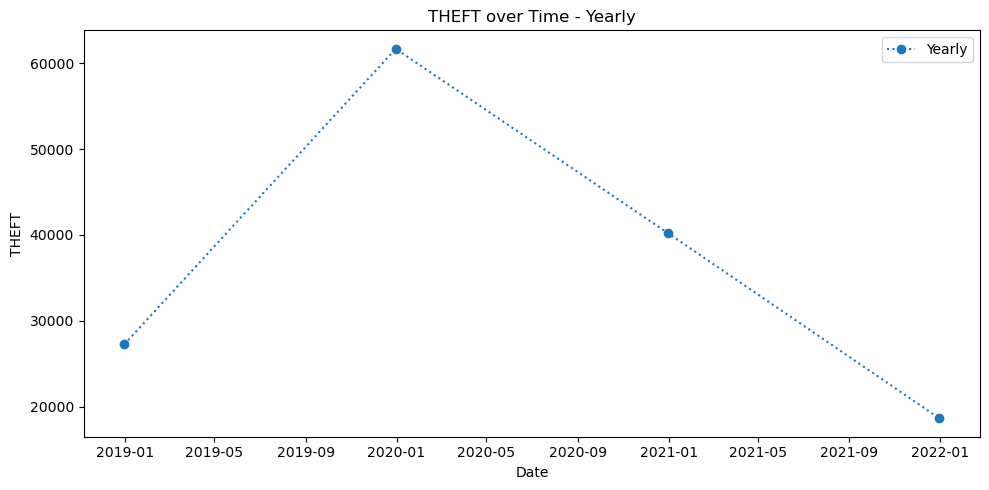

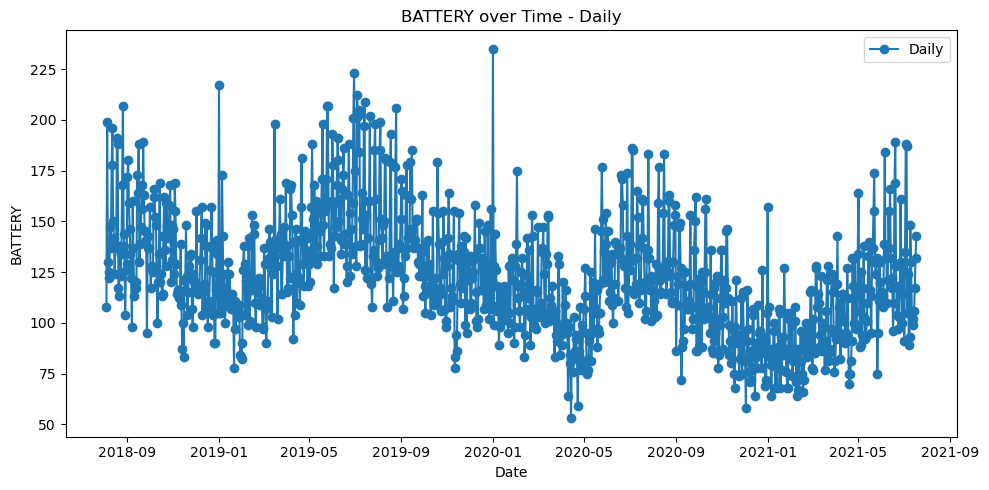

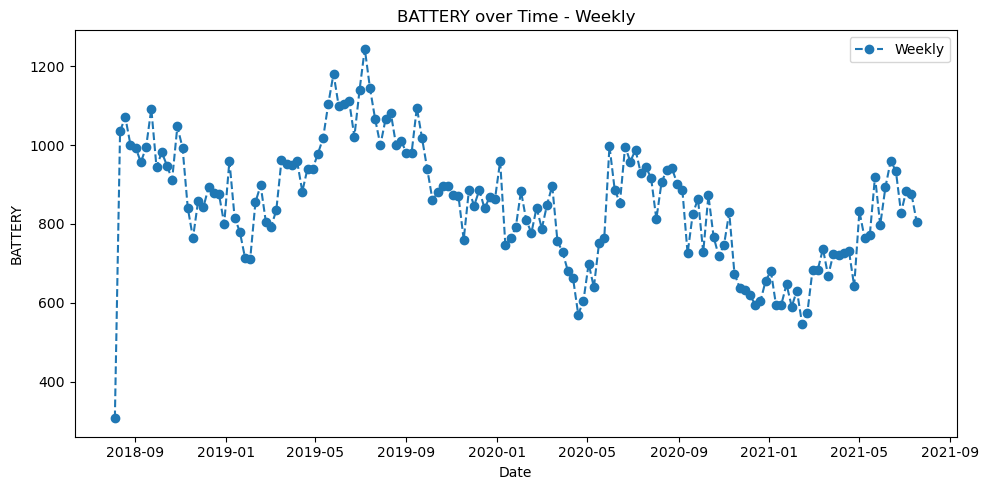

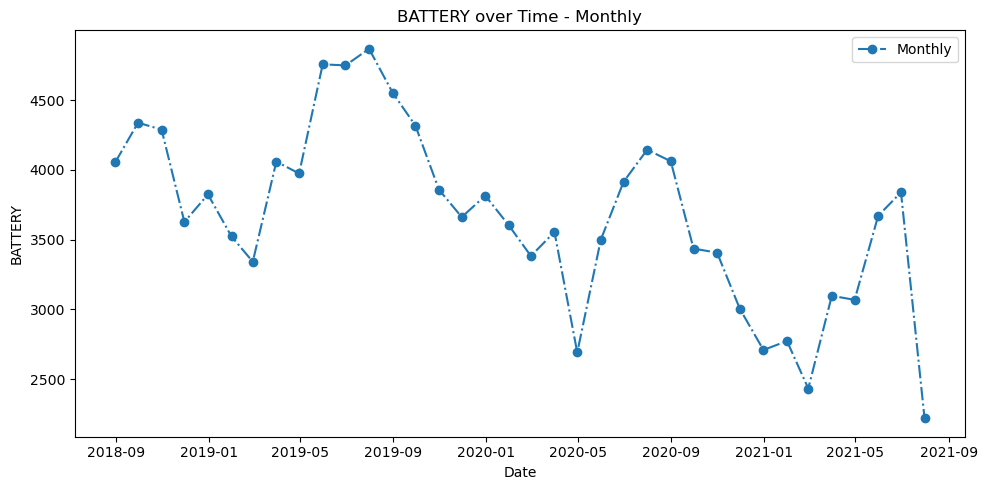

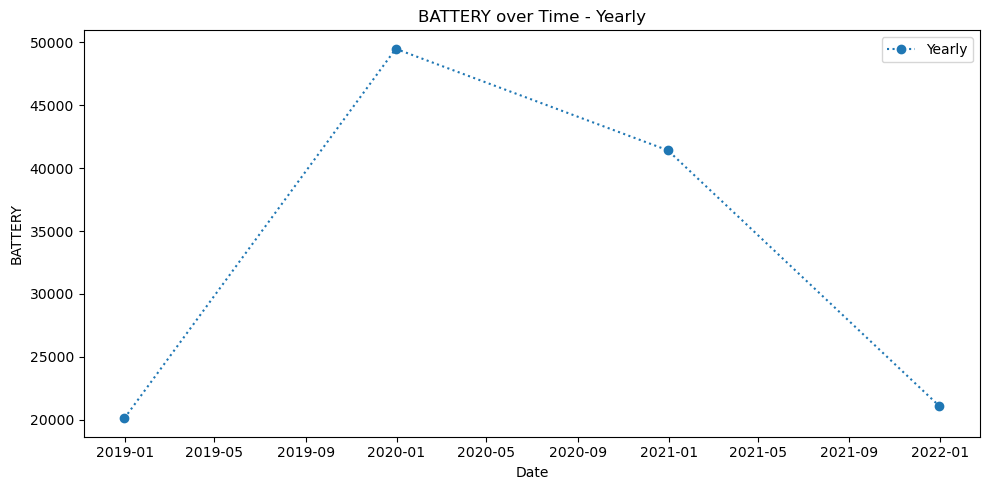

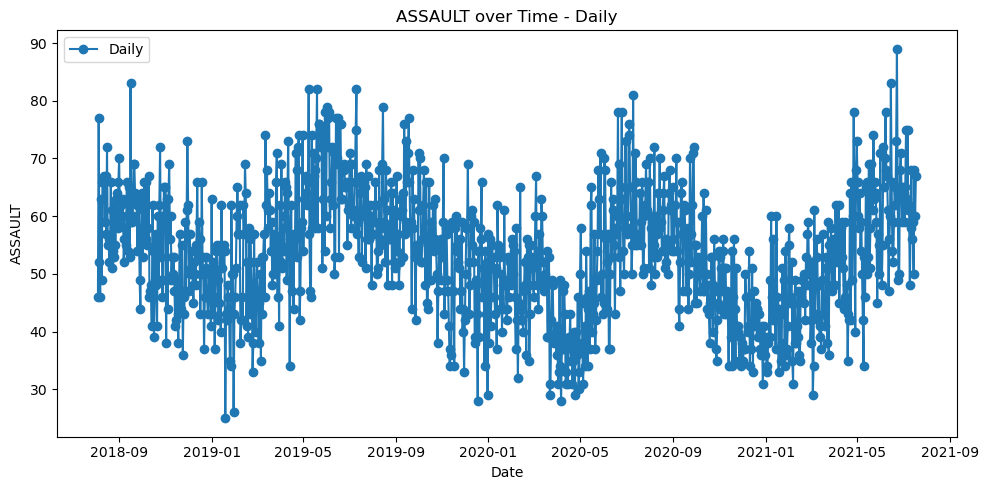

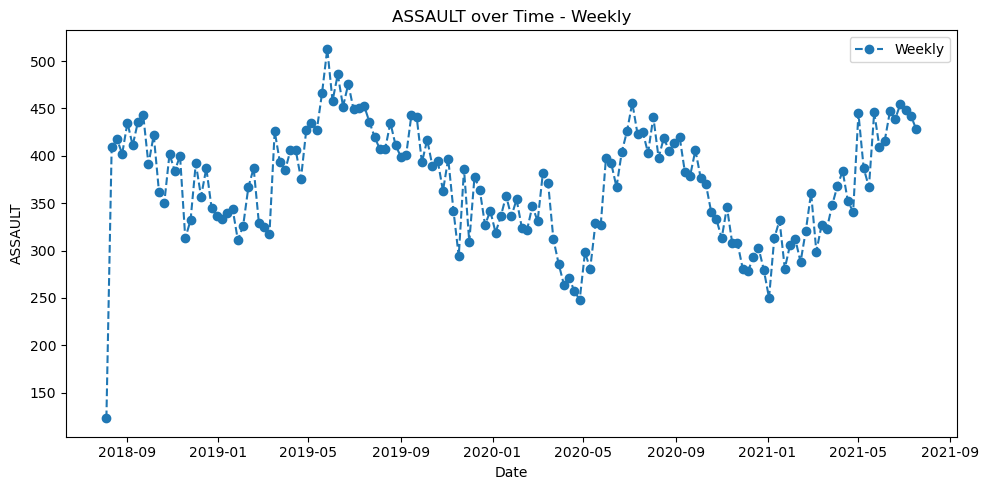

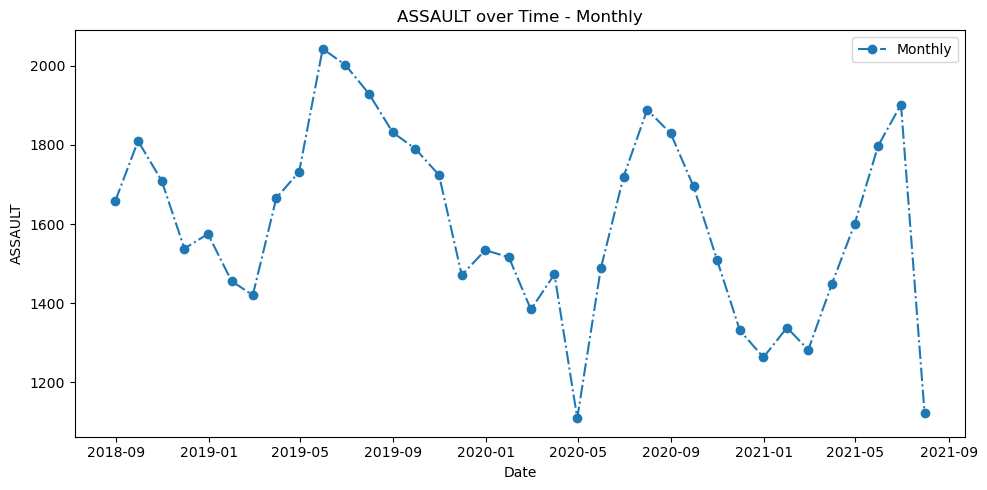

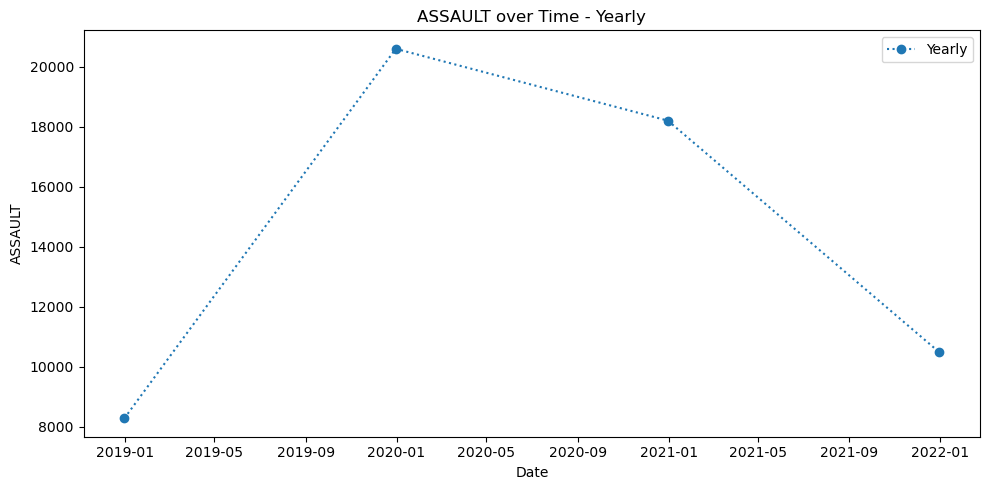

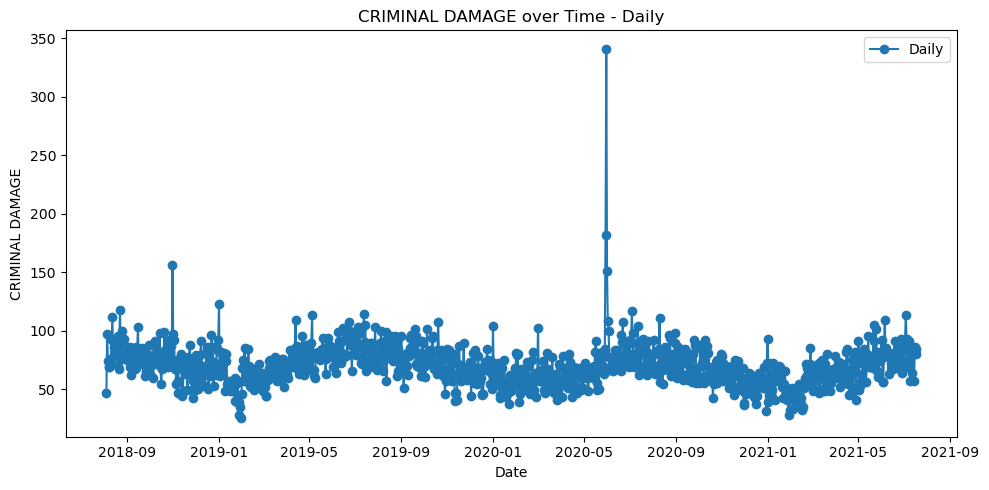

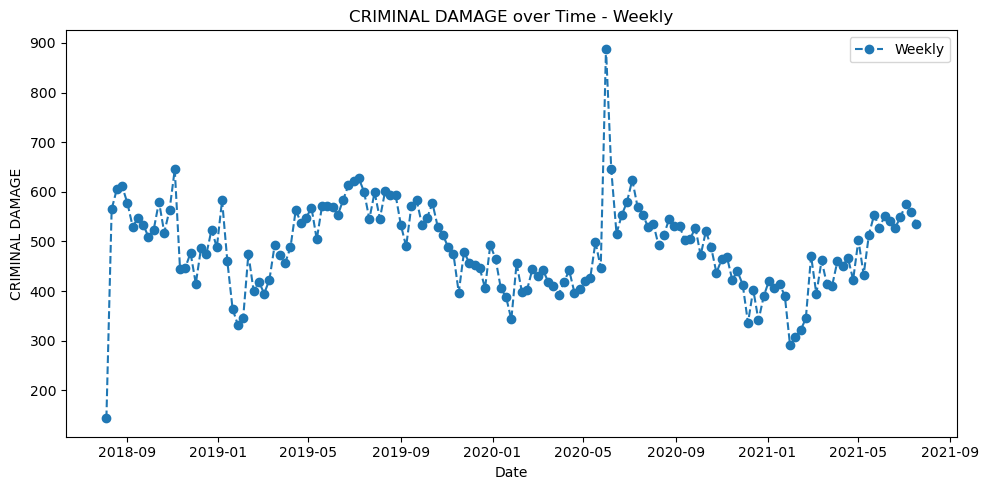

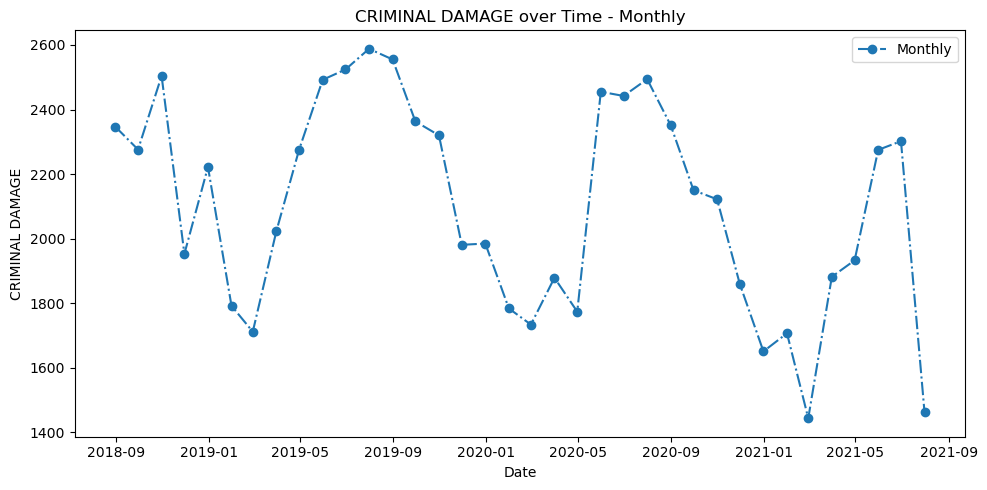

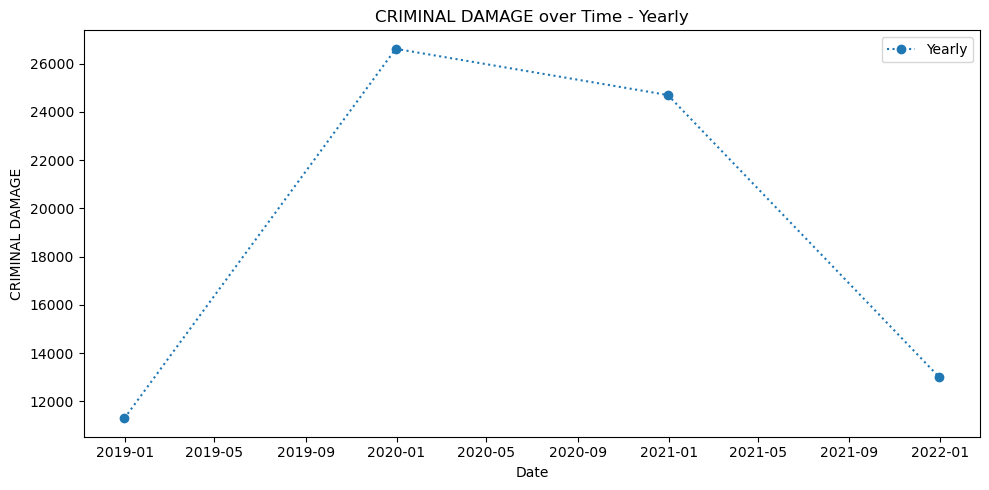

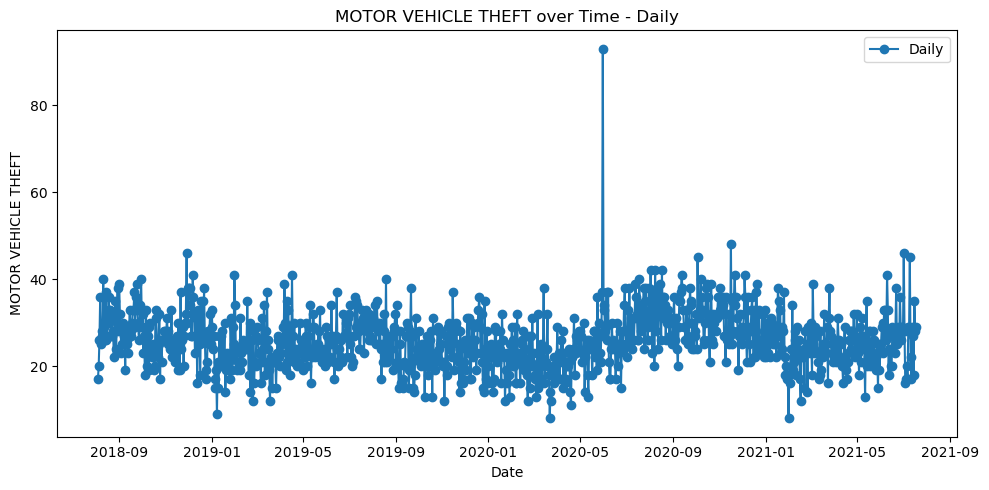

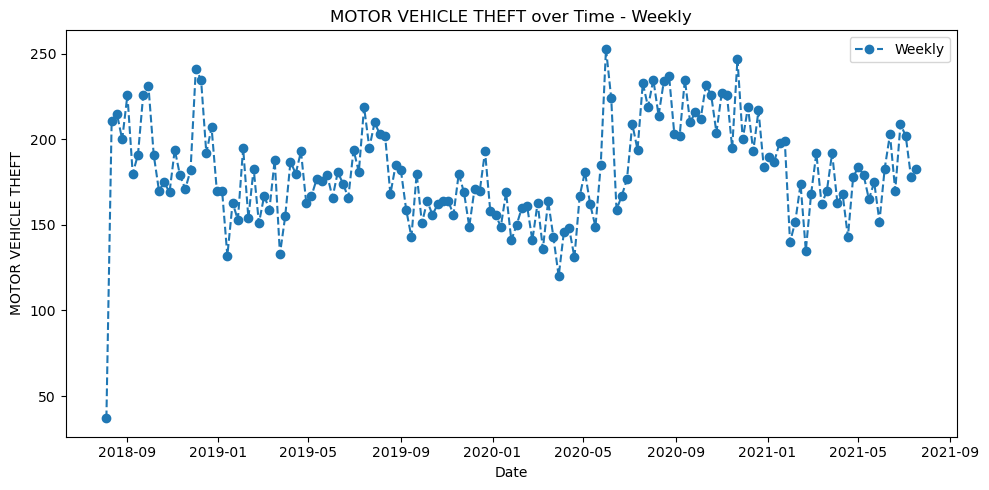

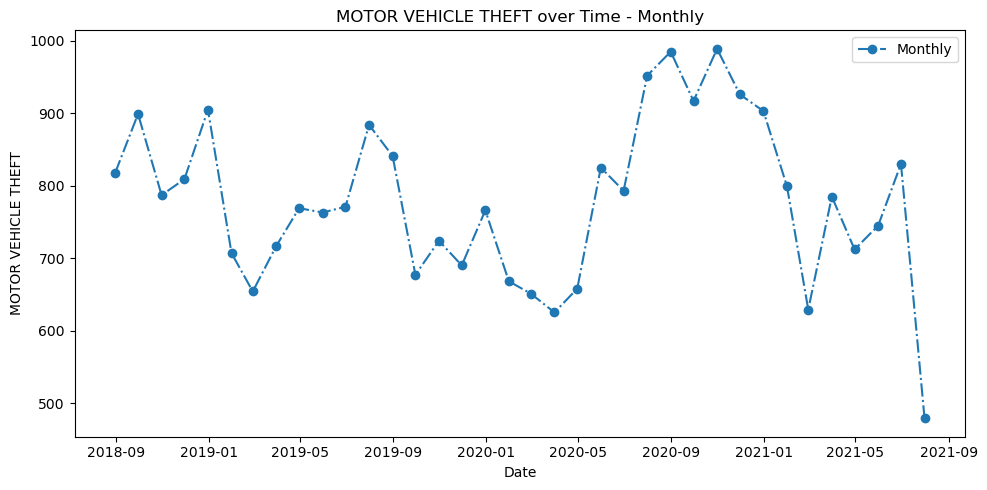

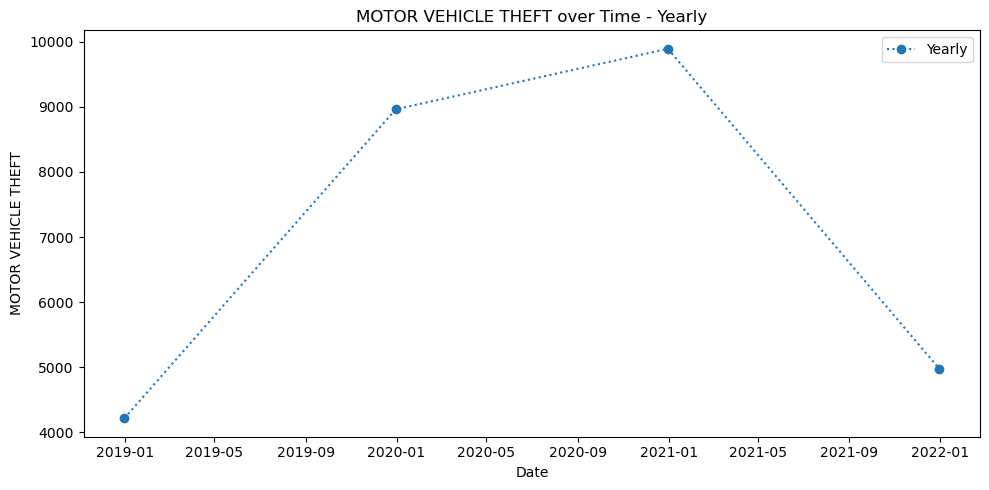

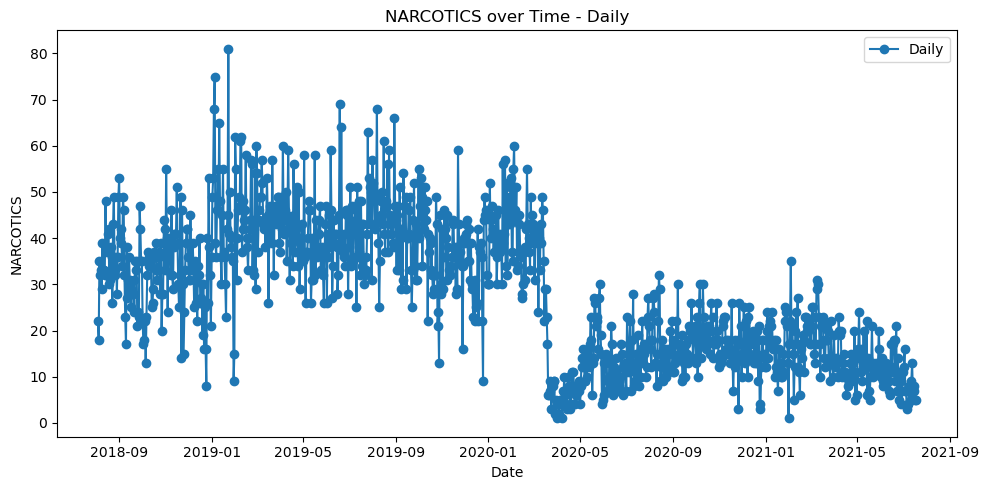

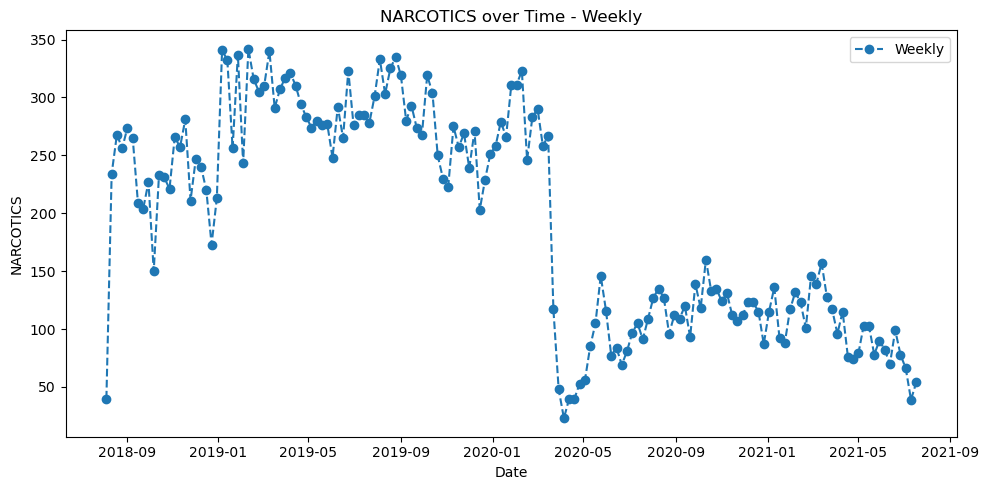

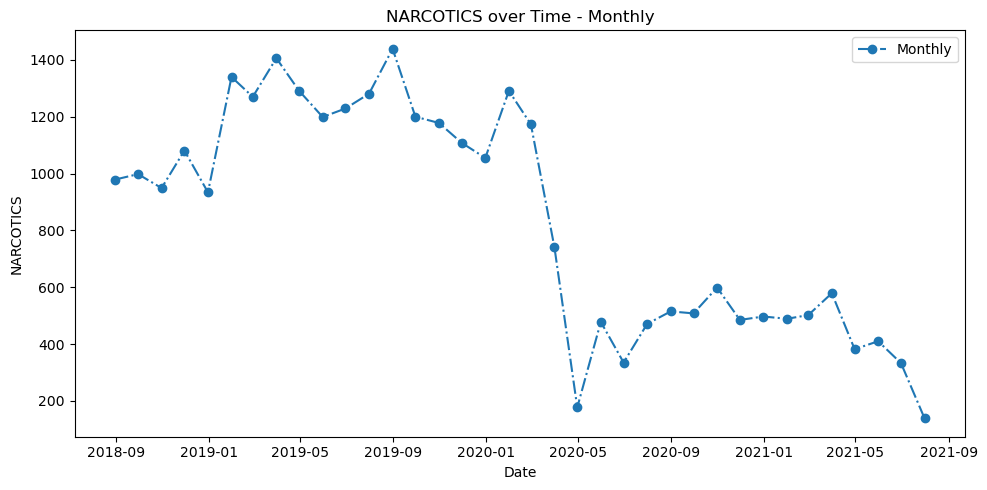

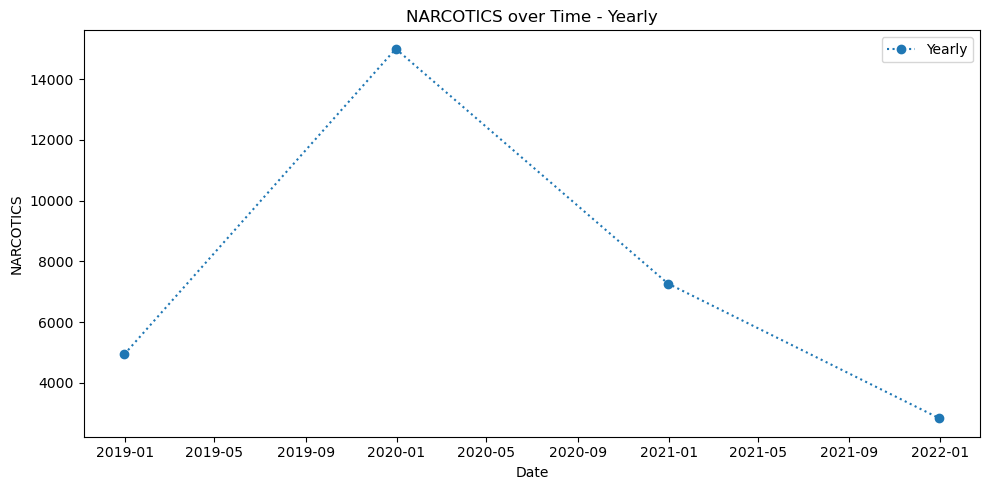

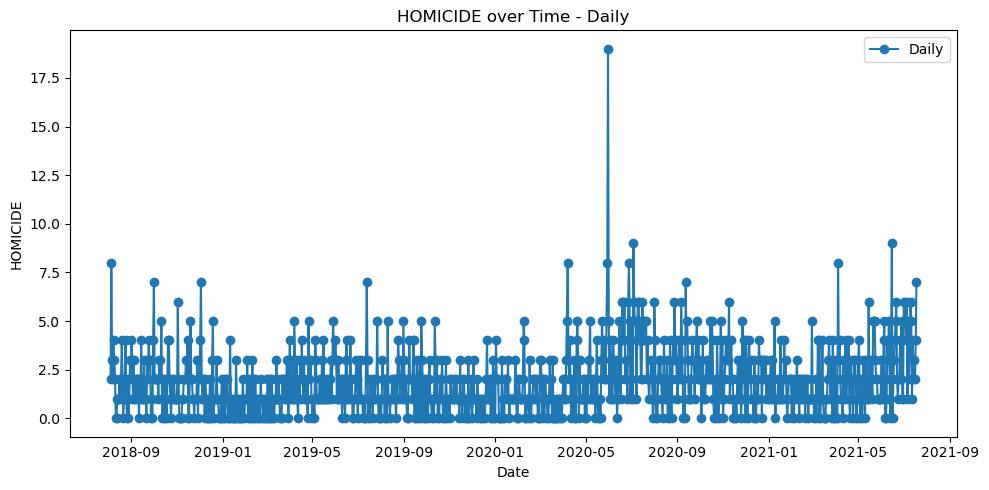

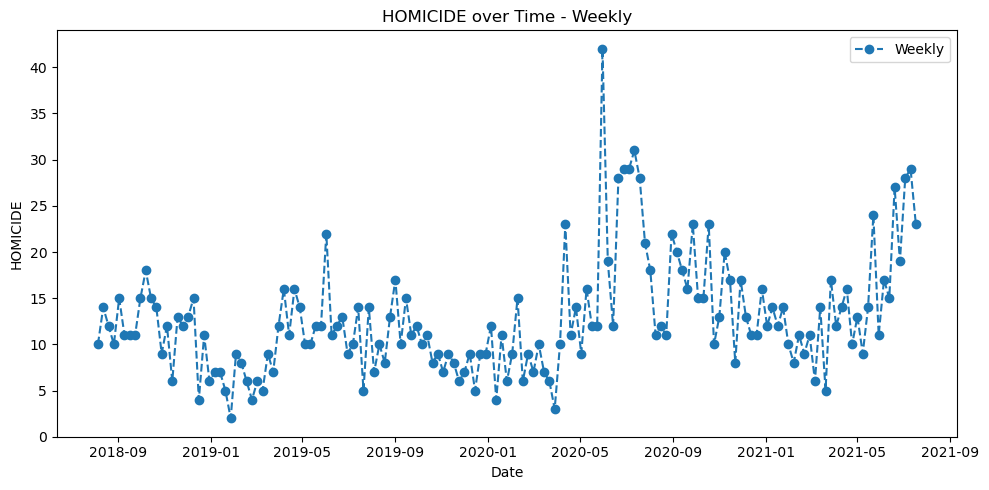

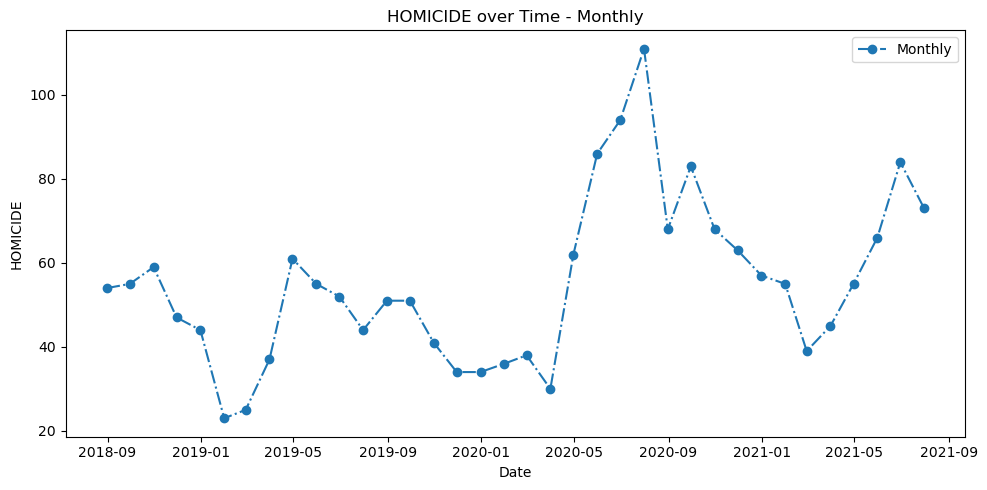

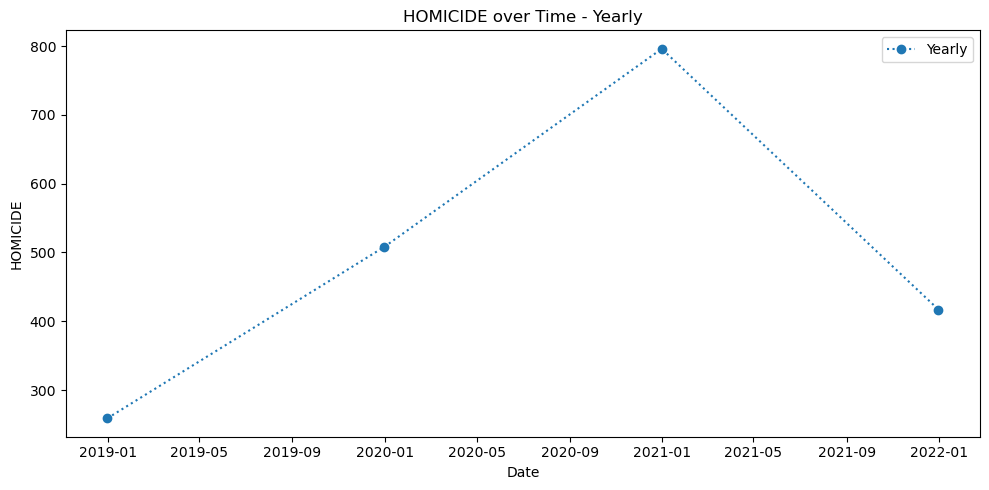

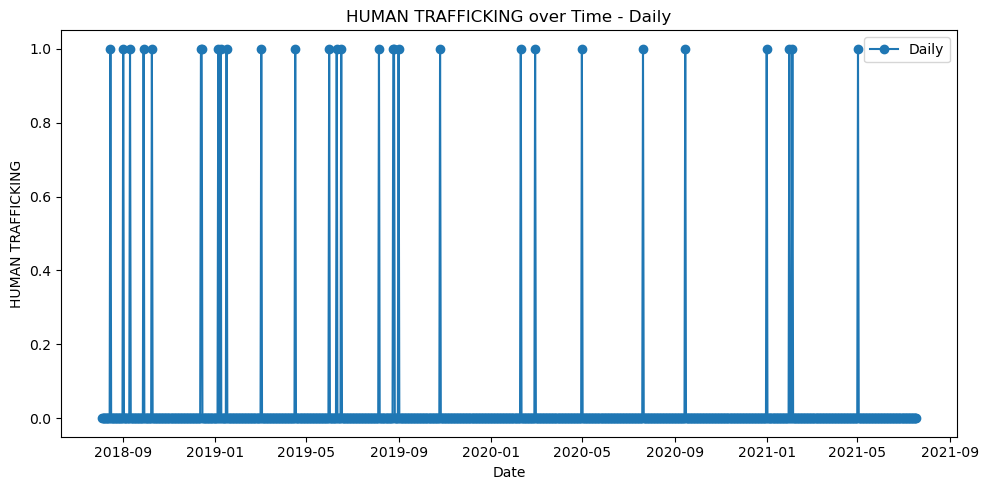

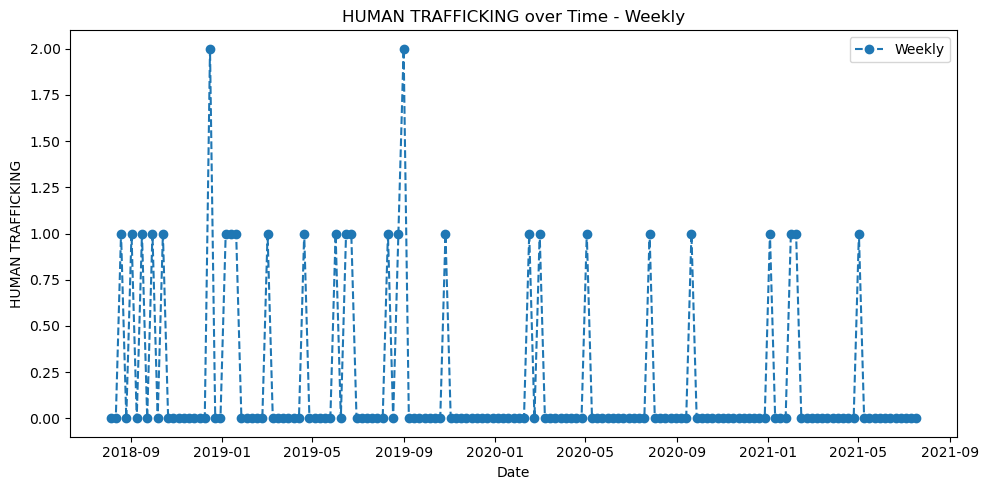

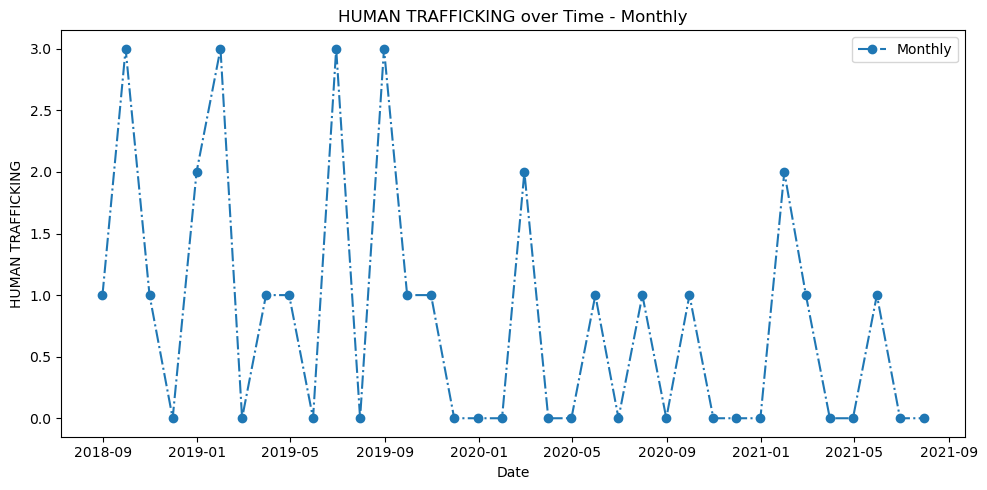

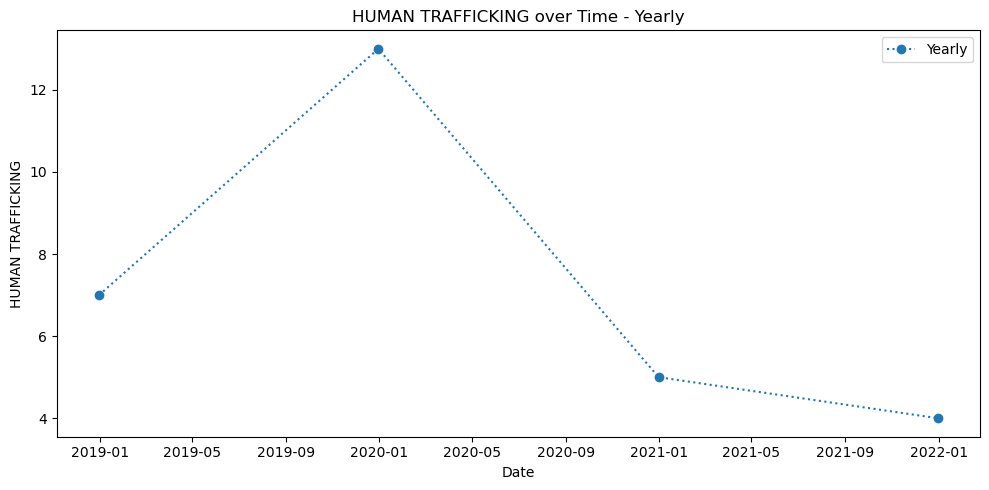

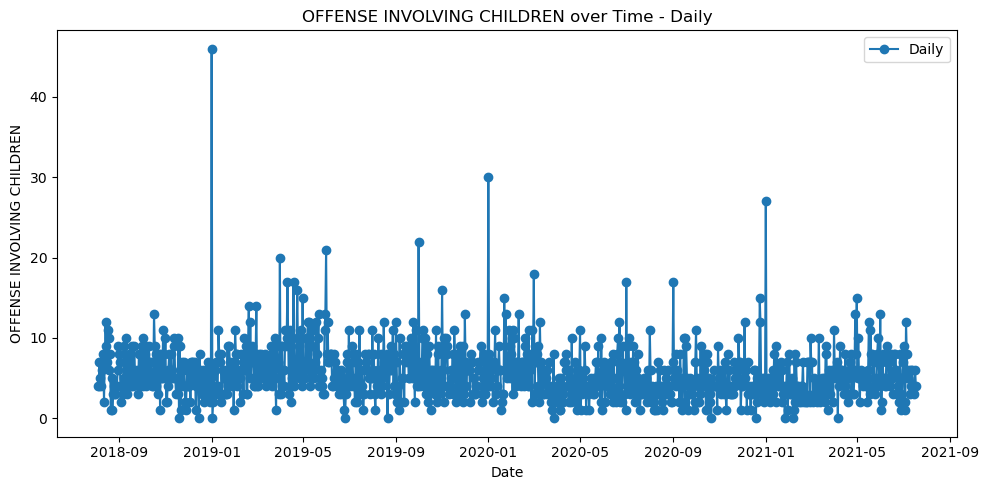

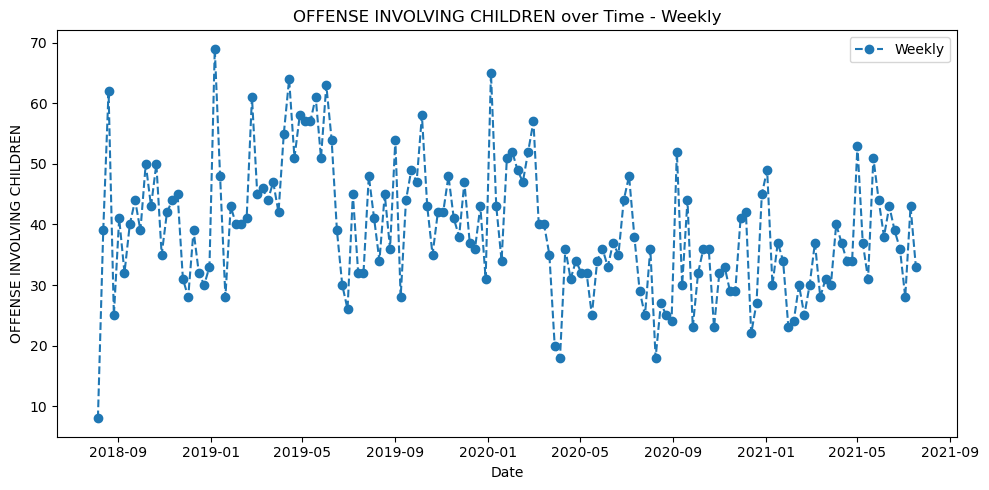

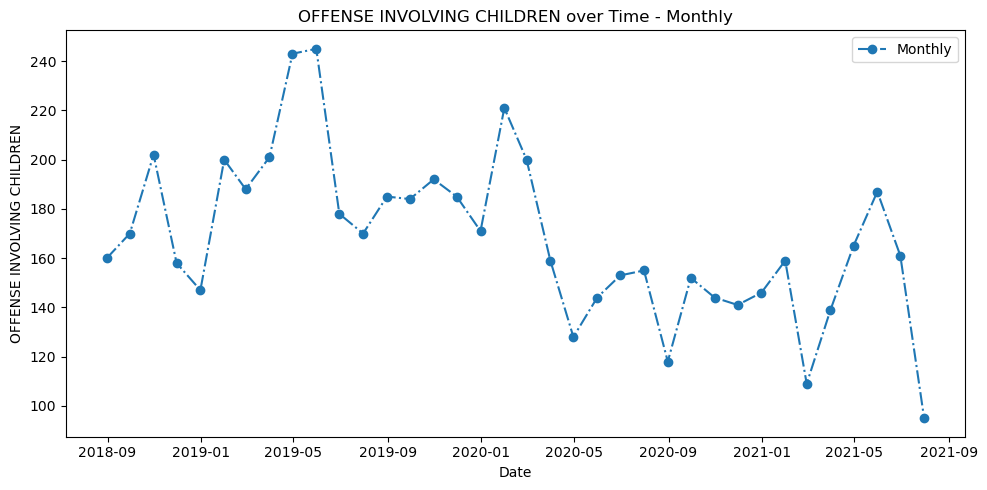

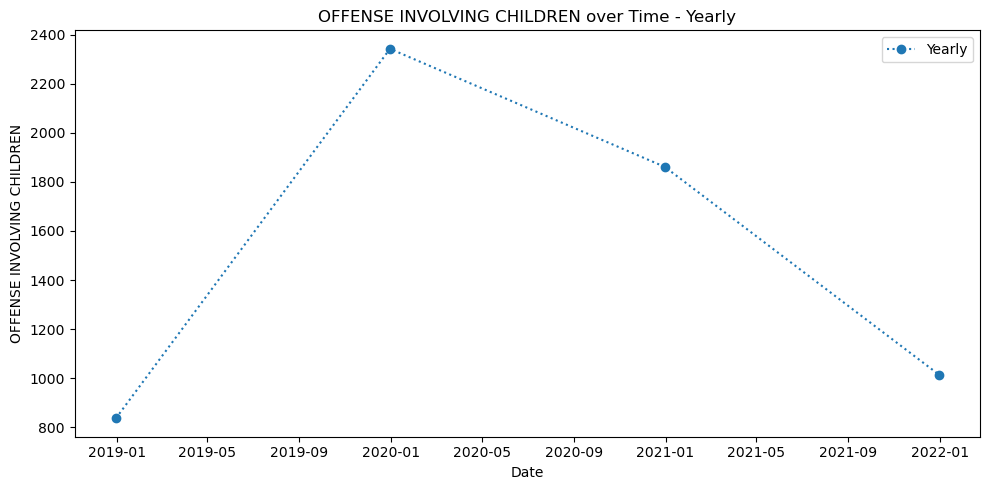

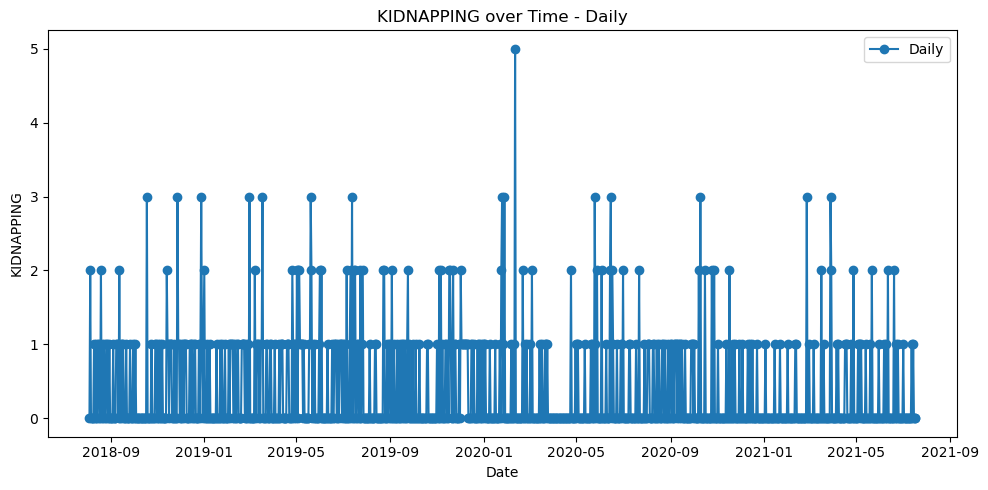

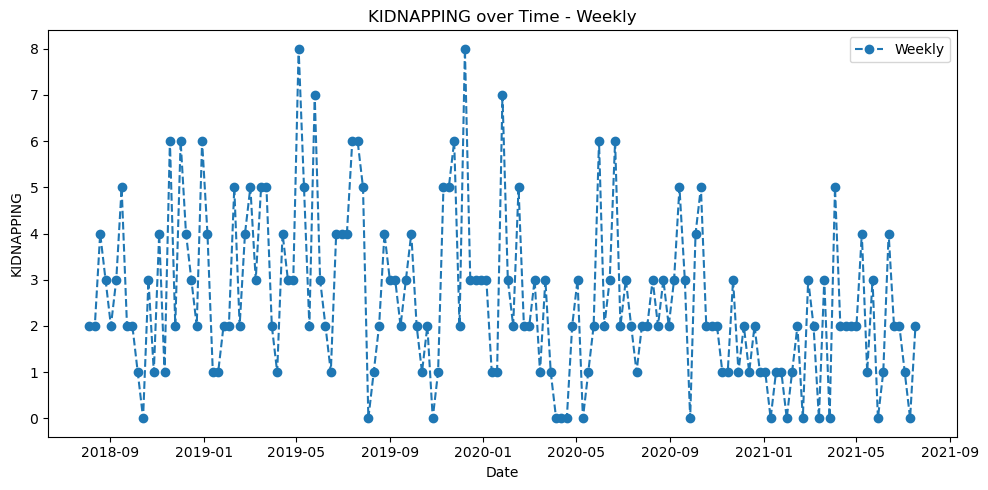

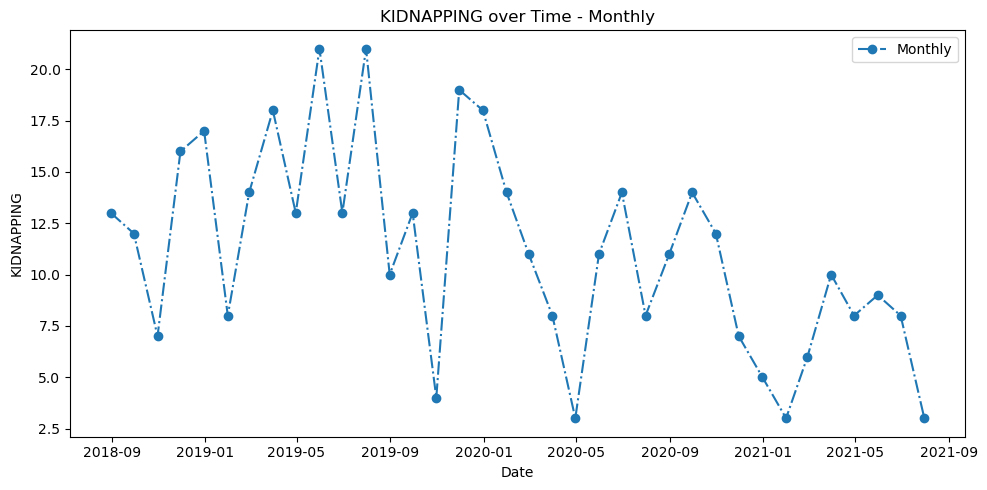

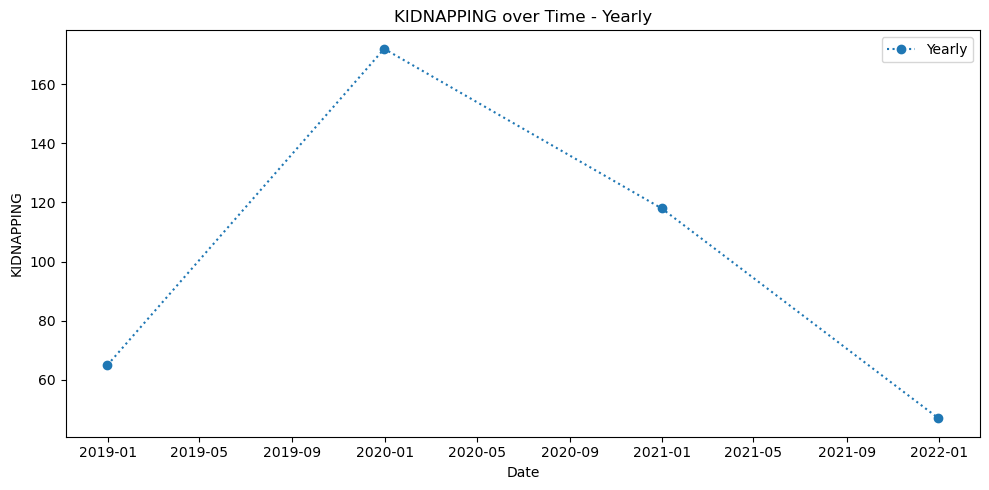

In [9]:
train['Date'] = pd.to_datetime(train.index)
train.set_index('Date', inplace=True)

data_weekly = train.resample('W').sum()
data_monthly = train.resample('M').sum()
data_yearly = train.resample('Y').sum()


columns = train.columns

for column in columns:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[column], label='Daily', linestyle='-', marker='o')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} over Time - Daily')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(data_weekly.index, data_weekly[column], label='Weekly', linestyle='--', marker='o')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} over Time - Weekly')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(data_monthly.index, data_monthly[column], label='Monthly', linestyle='-.', marker='o')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} over Time - Monthly')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(data_yearly.index, data_yearly[column], label='Yearly', linestyle=':', marker='o')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} over Time - Yearly')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [10]:
train

Primary Type,THEFT,BATTERY,ASSAULT,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,NARCOTICS,HOMICIDE,HUMAN TRAFFICKING,OFFENSE INVOLVING CHILDREN,KIDNAPPING
Date,,,,,,,,,,
2018-08-04,176,108,46,47,17,22,2,0,4,0
2018-08-05,223,199,77,97,20,18,8,0,4,2
2018-08-06,215,130,52,74,26,35,3,0,7,0
2018-08-07,232,122,46,69,36,32,2,0,5,0
2018-08-08,222,125,63,69,25,33,4,0,4,0
...,...,...,...,...,...,...,...,...,...,...
2021-07-14,102,102,59,80,27,7,2,0,4,0
2021-07-15,109,106,50,57,18,8,3,0,3,1
2021-07-16,128,117,68,86,35,7,2,0,4,0


train_size = int(len(df) * .5)
validate_size = int(len(df) * .3)
test_size = int(len(df) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = df[: train_size]
validate = df[train_size : validate_end_index]
test = df[validate_end_index : ]

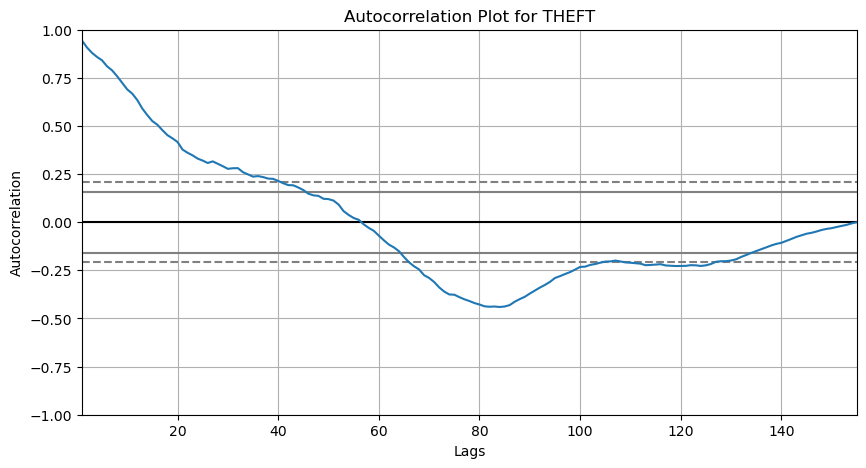

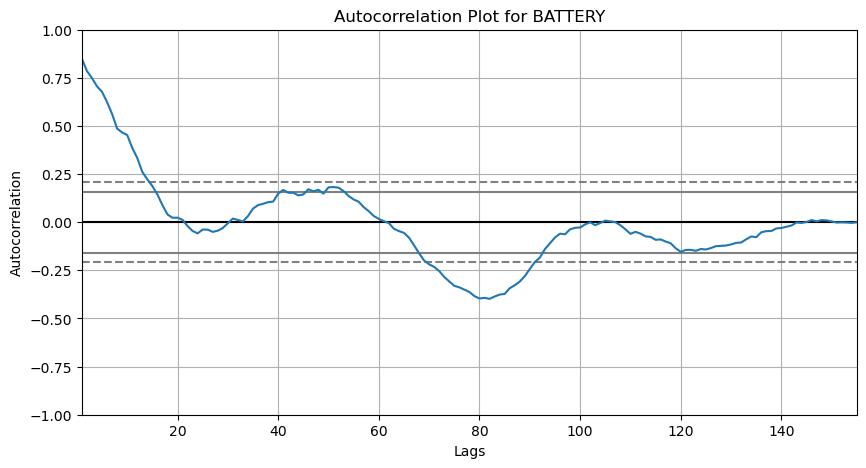

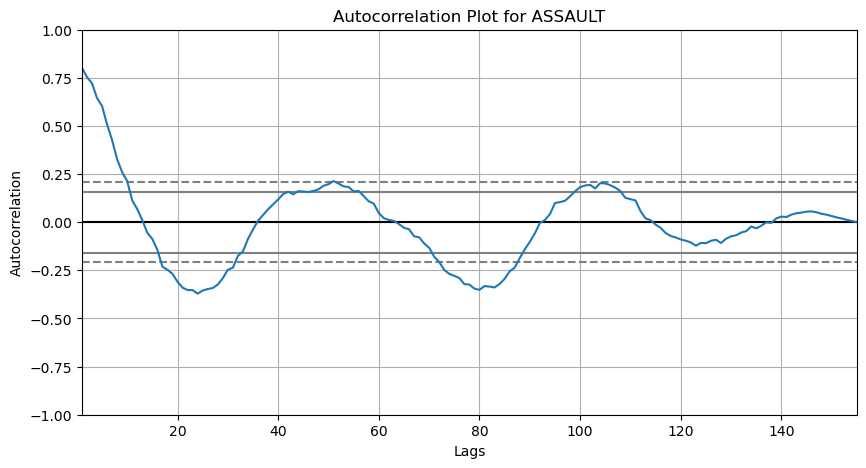

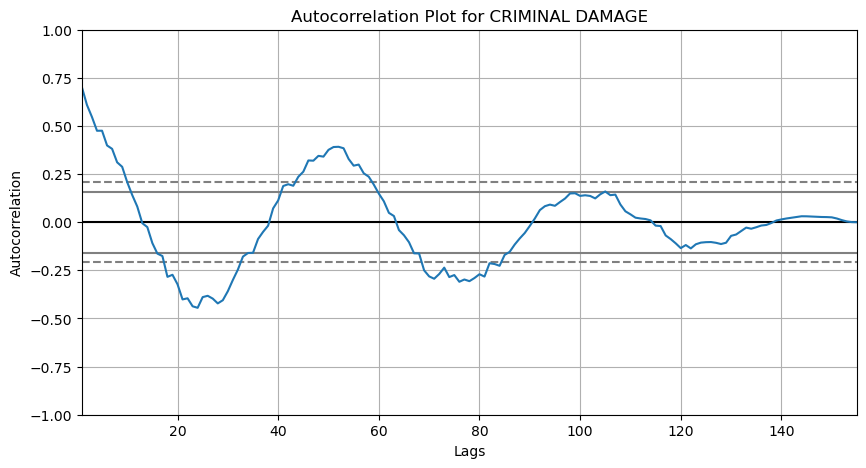

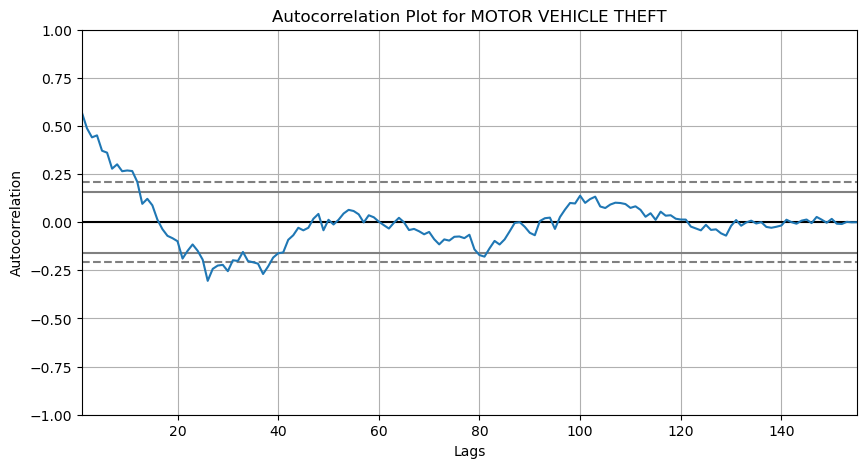

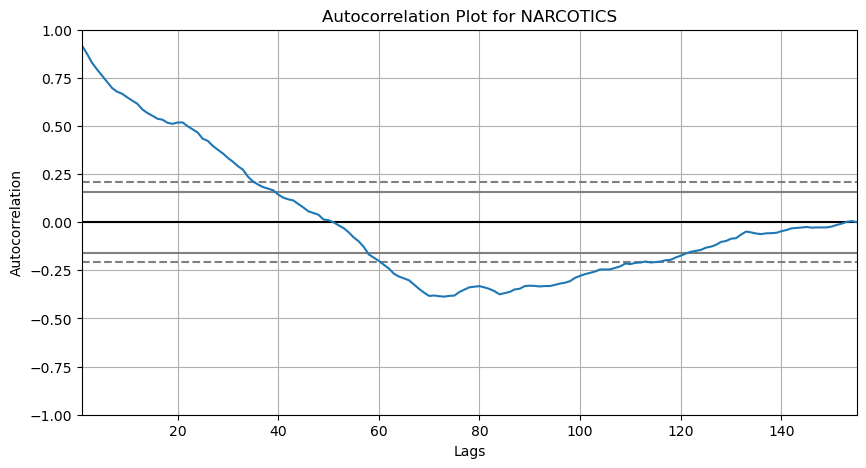

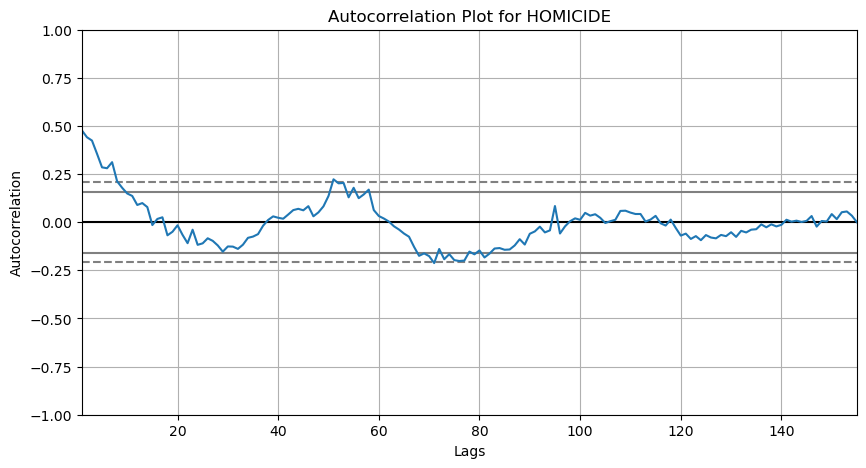

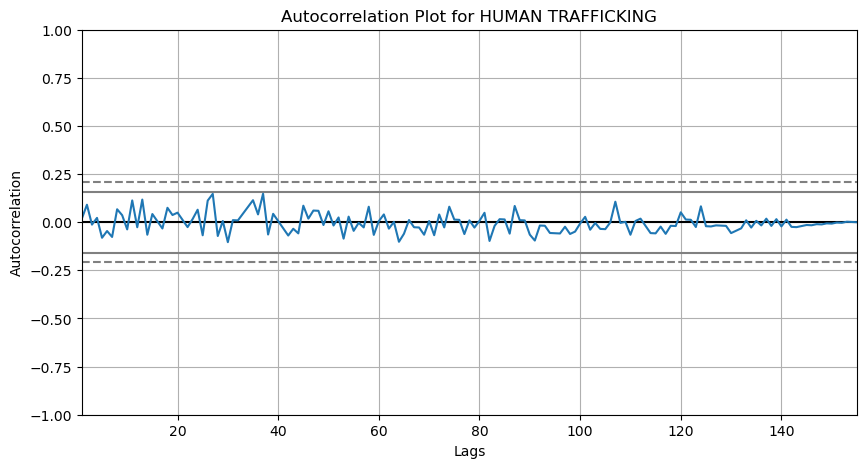

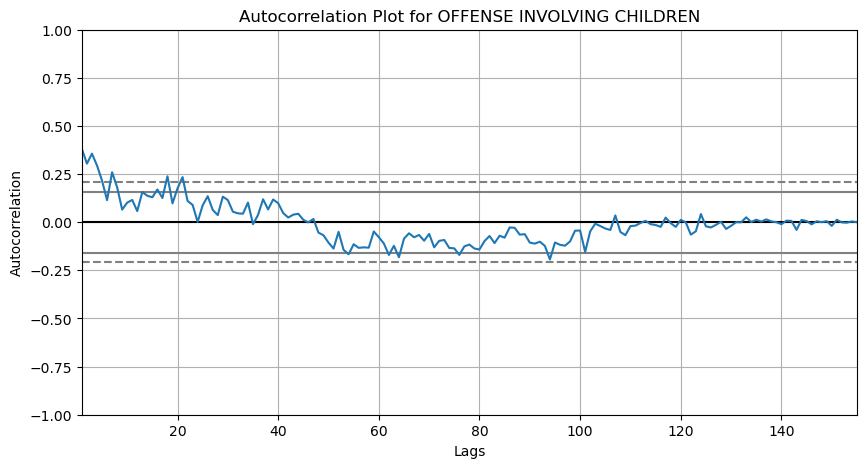

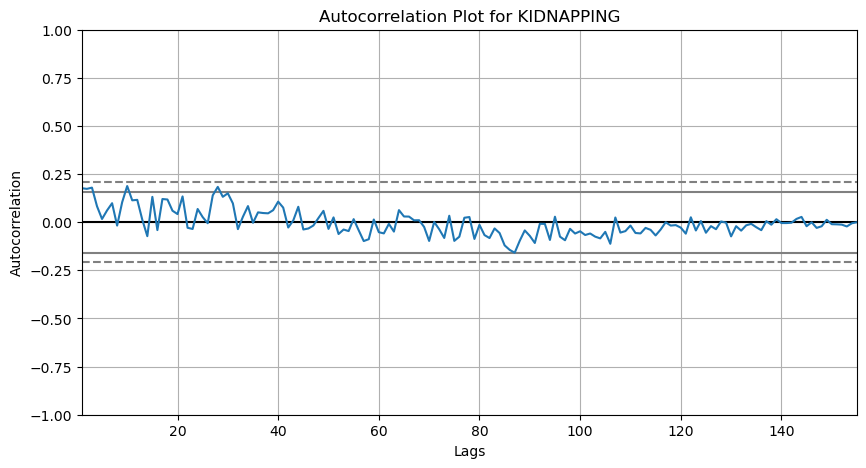

In [11]:
crime_types = ['THEFT', 'BATTERY', 'ASSAULT', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'HOMICIDE', 'HUMAN TRAFFICKING', 'OFFENSE INVOLVING CHILDREN', 'KIDNAPPING']

# Resample the data to daily frequency and calculate the mean for each crime type
train_resampled = train[crime_types].resample('W').mean()

# Loop through the crime types and create autocorrelation plots
for crime_type in crime_types:
    plt.figure(figsize=(10, 5))
    pd.plotting.autocorrelation_plot(train_resampled[crime_type])
    plt.xlabel("Lags")
    plt.ylabel("Autocorrelation")
    plt.title(f"Autocorrelation Plot for {crime_type}")
    plt.show()





BATTERY, ASSAULT, CRIMINAL DAMAGE have correlation wit time

HOMICIDE Lag: 35, 55, 75

In [12]:
lags = range(1, 366)



for lag in lags:
    train[f'BATTERY_Lag_{lag}'] = train['BATTERY'].shift(lag)


In [13]:
lags = range(1, 366)


for lag in lags:
    train[f'ASSAULT_Lag_{lag}'] = train['ASSAULT'].shift(lag)

In [14]:
lags = range(1, 366)


for lag in lags:
    train[f'CRIMINAL_DAMAGE_Lag_{lag}'] = train['CRIMINAL DAMAGE'].shift(lag)

In [15]:
lags = range(1, 366)


for lag in lags:
    train[f'HOMICIDE_Lag_{lag}'] = train['HOMICIDE'].shift(lag)

In [16]:
train

Primary Type,THEFT,BATTERY,ASSAULT,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,NARCOTICS,HOMICIDE,HUMAN TRAFFICKING,OFFENSE INVOLVING CHILDREN,KIDNAPPING,...,HOMICIDE_Lag_356,HOMICIDE_Lag_357,HOMICIDE_Lag_358,HOMICIDE_Lag_359,HOMICIDE_Lag_360,HOMICIDE_Lag_361,HOMICIDE_Lag_362,HOMICIDE_Lag_363,HOMICIDE_Lag_364,HOMICIDE_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-04,176,108,46,47,17,22,2,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-05,223,199,77,97,20,18,8,0,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-06,215,130,52,74,26,35,3,0,7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-07,232,122,46,69,36,32,2,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-08,222,125,63,69,25,33,4,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14,102,102,59,80,27,7,2,0,4,0,...,4.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0,2.0,2.0
2021-07-15,109,106,50,57,18,8,3,0,3,1,...,2.0,4.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0,2.0
2021-07-16,128,117,68,86,35,7,2,0,4,0,...,1.0,2.0,4.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0


In [17]:
train = train.dropna()

In [18]:
train

Primary Type,THEFT,BATTERY,ASSAULT,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,NARCOTICS,HOMICIDE,HUMAN TRAFFICKING,OFFENSE INVOLVING CHILDREN,KIDNAPPING,...,HOMICIDE_Lag_356,HOMICIDE_Lag_357,HOMICIDE_Lag_358,HOMICIDE_Lag_359,HOMICIDE_Lag_360,HOMICIDE_Lag_361,HOMICIDE_Lag_362,HOMICIDE_Lag_363,HOMICIDE_Lag_364,HOMICIDE_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-04,224,199,59,89,34,42,2,0,3,0,...,1.0,0.0,0.0,2.0,3.0,4.0,2.0,3.0,8.0,2.0
2019-08-05,186,151,66,100,29,43,2,0,1,1,...,1.0,1.0,0.0,0.0,2.0,3.0,4.0,2.0,3.0,8.0
2019-08-06,177,142,62,87,25,49,0,1,5,0,...,1.0,1.0,1.0,0.0,0.0,2.0,3.0,4.0,2.0,3.0
2019-08-07,182,129,50,90,35,68,2,0,4,0,...,2.0,1.0,1.0,1.0,0.0,0.0,2.0,3.0,4.0,2.0
2019-08-08,227,148,51,65,28,44,0,0,6,0,...,1.0,2.0,1.0,1.0,1.0,0.0,0.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14,102,102,59,80,27,7,2,0,4,0,...,4.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0,2.0,2.0
2021-07-15,109,106,50,57,18,8,3,0,3,1,...,2.0,4.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0,2.0
2021-07-16,128,117,68,86,35,7,2,0,4,0,...,1.0,2.0,4.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0


In [19]:
battery_train = ['BATTERY'] + [f'BATTERY_Lag_{lag}' for lag in range(1, 366)]

battery_train_df = train[battery_train].copy()


In [20]:
battery_train_df.head()

Primary Type,BATTERY,BATTERY_Lag_1,BATTERY_Lag_2,BATTERY_Lag_3,BATTERY_Lag_4,BATTERY_Lag_5,BATTERY_Lag_6,BATTERY_Lag_7,BATTERY_Lag_8,BATTERY_Lag_9,...,BATTERY_Lag_356,BATTERY_Lag_357,BATTERY_Lag_358,BATTERY_Lag_359,BATTERY_Lag_360,BATTERY_Lag_361,BATTERY_Lag_362,BATTERY_Lag_363,BATTERY_Lag_364,BATTERY_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-04,199,185.0,141.0,127.0,123.0,130.0,161.0,198.0,185.0,136.0,...,150.0,196.0,178.0,137.0,147.0,125.0,122.0,130.0,199.0,108.0
2019-08-05,151,199.0,185.0,141.0,127.0,123.0,130.0,161.0,198.0,185.0,...,142.0,150.0,196.0,178.0,137.0,147.0,125.0,122.0,130.0,199.0
2019-08-06,142,151.0,199.0,185.0,141.0,127.0,123.0,130.0,161.0,198.0,...,124.0,142.0,150.0,196.0,178.0,137.0,147.0,125.0,122.0,130.0
2019-08-07,129,142.0,151.0,199.0,185.0,141.0,127.0,123.0,130.0,161.0,...,139.0,124.0,142.0,150.0,196.0,178.0,137.0,147.0,125.0,122.0
2019-08-08,148,129.0,142.0,151.0,199.0,185.0,141.0,127.0,123.0,130.0,...,137.0,139.0,124.0,142.0,150.0,196.0,178.0,137.0,147.0,125.0


In [21]:
criminal_damage_train = ['CRIMINAL DAMAGE'] + [f'CRIMINAL_DAMAGE_Lag_{lag}' for lag in range(1, 366)]

criminal_damage_train_df = train[criminal_damage_train].copy()


In [22]:
criminal_damage_train_df.head()

Primary Type,CRIMINAL DAMAGE,CRIMINAL_DAMAGE_Lag_1,CRIMINAL_DAMAGE_Lag_2,CRIMINAL_DAMAGE_Lag_3,CRIMINAL_DAMAGE_Lag_4,CRIMINAL_DAMAGE_Lag_5,CRIMINAL_DAMAGE_Lag_6,CRIMINAL_DAMAGE_Lag_7,CRIMINAL_DAMAGE_Lag_8,CRIMINAL_DAMAGE_Lag_9,...,CRIMINAL_DAMAGE_Lag_356,CRIMINAL_DAMAGE_Lag_357,CRIMINAL_DAMAGE_Lag_358,CRIMINAL_DAMAGE_Lag_359,CRIMINAL_DAMAGE_Lag_360,CRIMINAL_DAMAGE_Lag_361,CRIMINAL_DAMAGE_Lag_362,CRIMINAL_DAMAGE_Lag_363,CRIMINAL_DAMAGE_Lag_364,CRIMINAL_DAMAGE_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-04,89,80.0,81.0,79.0,71.0,66.0,80.0,103.0,81.0,78.0,...,77.0,112.0,92.0,74.0,75.0,69.0,69.0,74.0,97.0,47.0
2019-08-05,100,89.0,80.0,81.0,79.0,71.0,66.0,80.0,103.0,81.0,...,86.0,77.0,112.0,92.0,74.0,75.0,69.0,69.0,74.0,97.0
2019-08-06,87,100.0,89.0,80.0,81.0,79.0,71.0,66.0,80.0,103.0,...,79.0,86.0,77.0,112.0,92.0,74.0,75.0,69.0,69.0,74.0
2019-08-07,90,87.0,100.0,89.0,80.0,81.0,79.0,71.0,66.0,80.0,...,93.0,79.0,86.0,77.0,112.0,92.0,74.0,75.0,69.0,69.0
2019-08-08,65,90.0,87.0,100.0,89.0,80.0,81.0,79.0,71.0,66.0,...,91.0,93.0,79.0,86.0,77.0,112.0,92.0,74.0,75.0,69.0


In [23]:
assault_train = ['ASSAULT'] + [f'ASSAULT_Lag_{lag}' for lag in range(1, 366)]

assault_train_df = train[assault_train].copy()

In [24]:
assault_train_df.head()

Primary Type,ASSAULT,ASSAULT_Lag_1,ASSAULT_Lag_2,ASSAULT_Lag_3,ASSAULT_Lag_4,ASSAULT_Lag_5,ASSAULT_Lag_6,ASSAULT_Lag_7,ASSAULT_Lag_8,ASSAULT_Lag_9,...,ASSAULT_Lag_356,ASSAULT_Lag_357,ASSAULT_Lag_358,ASSAULT_Lag_359,ASSAULT_Lag_360,ASSAULT_Lag_361,ASSAULT_Lag_362,ASSAULT_Lag_363,ASSAULT_Lag_364,ASSAULT_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-04,59,62.0,57.0,59.0,48.0,60.0,62.0,56.0,56.0,67.0,...,59.0,67.0,66.0,66.0,49.0,63.0,46.0,52.0,77.0,46.0
2019-08-05,66,59.0,62.0,57.0,59.0,48.0,60.0,62.0,56.0,56.0,...,67.0,59.0,67.0,66.0,66.0,49.0,63.0,46.0,52.0,77.0
2019-08-06,62,66.0,59.0,62.0,57.0,59.0,48.0,60.0,62.0,56.0,...,57.0,67.0,59.0,67.0,66.0,66.0,49.0,63.0,46.0,52.0
2019-08-07,50,62.0,66.0,59.0,62.0,57.0,59.0,48.0,60.0,62.0,...,72.0,57.0,67.0,59.0,67.0,66.0,66.0,49.0,63.0,46.0
2019-08-08,51,50.0,62.0,66.0,59.0,62.0,57.0,59.0,48.0,60.0,...,55.0,72.0,57.0,67.0,59.0,67.0,66.0,66.0,49.0,63.0


### Lags needing captured of the 365

#### Assault:25, 80
#### Battery: 83
#### Criminal Damage: 25, 45, 75

### MODELING ASSAULT

### LAST OBSERVED

In [25]:
target_col = 'ASSAULT' 
predictor_lag25_col = 'ASSAULT_Lag_25'  
predictor_lag80_col = 'ASSAULT_Lag_80'  

target = assault_train_df[target_col].shift(-365) 
predictor_lag25 = assault_train_df[predictor_lag25_col]
predictor_lag80 = assault_train_df[predictor_lag80_col]

predictors = pd.concat([predictor_lag25, predictor_lag80], axis=1)


target = target.dropna()
predictors = predictors.dropna()

min_samples = min(len(target), len(predictors))
target = target[:min_samples]
predictors = predictors[:min_samples]

target = target.dropna()


train_ratio = 0.8 
train_size = int(train_ratio * len(target))

train_target = target[:train_size]
train_predictors = predictors[:train_size]
test_target = target[train_size:]
test_predictors = predictors[train_size:]

model = LinearRegression()
model.fit(train_predictors, train_target)

predictions = model.predict(test_predictors)


mse = mean_squared_error(test_target, predictions)**.5


metrics_assault = pd.DataFrame({
    'Model': ['Last Observed Baseline'],
    'Target': 'ASSAULT',
    'RMSE': [mse]
})

metrics_assault



,Model,Target,RMSE
0,Last Observed Baseline,ASSAULT,17.522252


### SIMPLE AVG

In [26]:
historical_average = target.mean()

predictions_simple_avg = [historical_average] * len(test_target)


mse_simple_avg = mean_squared_error(test_target, predictions)**.5

metrics_assault = metrics_assault.append({
    'Model': 'Simple Average Baseline',
    'Target': 'ASSAULT',
    'RMSE': mse_simple_avg
}, ignore_index=True)

In [27]:
metrics_assault




,Model,Target,RMSE
0,Last Observed Baseline,ASSAULT,17.522252
1,Simple Average Baseline,ASSAULT,17.522252


### MOVING AVG

In [28]:
window_size = 30
moving_average = target.rolling(window=window_size).mean()
min_samples = min(len(target), len(predictions))
moving_average = moving_average.dropna()

last_value = moving_average.iloc[-1]
predictions = [last_value] * len(test_target)

mse = mean_squared_error(test_target, predictions) ** 0.5

metrics_assault = metrics_assault.append({
    'Model': 'Moving Average Baseline (Window Size {})'.format(window_size),
    'Target' : 'ASSAULT',
    'RMSE': mse
}, ignore_index=True)


In [29]:
metrics_assault

,Model,Target,RMSE
0,Last Observed Baseline,ASSAULT,17.522252
1,Simple Average Baseline,ASSAULT,17.522252
2,Moving Average Baseline (Window Size 30),ASSAULT,9.598768


## SIMPLE EXP SMOOTHING

In [30]:
simple_exponential_model = sm.tsa.SimpleExpSmoothing(train_target)
simple_exponential_fit = simple_exponential_model.fit()


predictions = simple_exponential_fit.forecast(len(test_target))


mse = mean_squared_error(test_target, predictions)**.5

metrics_assault = metrics_assault.append({
    'Model': 'Simple Exponential Smoothing',
    'Target': 'ASSAULT',
    'RMSE': mse
}, ignore_index=True)



/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [31]:
metrics_assault

,Model,Target,RMSE
0,Last Observed Baseline,ASSAULT,17.522252
1,Simple Average Baseline,ASSAULT,17.522252
2,Moving Average Baseline (Window Size 30),ASSAULT,9.598768
3,Simple Exponential Smoothing,ASSAULT,10.989048


## HOLTS LINEAR TREND

In [32]:
holt_linear_model = sm.tsa.Holt(train_target, damped=True)
holt_linear_fit = holt_linear_model.fit()

predictions = holt_linear_fit.forecast(len(test_target))

mse = mean_squared_error(test_target, predictions)**.5


metrics_assault = metrics_assault.append({
    'Model': 'Holts Linear Trend Forecasting',
    'Target' : 'ASSAULT',
    'RMSE': mse
}, ignore_index=True)


/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [33]:
metrics_assault

,Model,Target,RMSE
0,Last Observed Baseline,ASSAULT,17.522252
1,Simple Average Baseline,ASSAULT,17.522252
2,Moving Average Baseline (Window Size 30),ASSAULT,9.598768
3,Simple Exponential Smoothing,ASSAULT,10.989048
4,Holts Linear Trend Forecasting,ASSAULT,10.991481


## MODELING BATTERY

### LAST OBSERVED

In [34]:
target_col = 'BATTERY' 
predictor_lag83_col = 'BATTERY_Lag_83'  
 

target = battery_train_df[target_col].shift(-365) 
predictor_lag83 = battery_train_df[predictor_lag83_col]


predictors = pd.concat([predictor_lag83],axis=1)


target = target.dropna()
predictors = predictors.dropna()

min_samples = min(len(target), len(predictors))
target = target[:min_samples]
predictors = predictors[:min_samples]

target = target.dropna()


train_ratio = 0.8 
train_size = int(train_ratio * len(target))

train_target = target[:train_size]
train_predictors = predictors[:train_size]
test_target = target[train_size:]
test_predictors = predictors[train_size:]

model = LinearRegression()
model.fit(train_predictors, train_target)

predictions = model.predict(test_predictors)


mse = mean_squared_error(test_target, predictions)**.5


metrics_battery = pd.DataFrame({
    'Model': ['Last Observed Baseline'],
    'Target': 'BATTERY',
    'RMSE': [mse]
})

metrics_battery







,Model,Target,RMSE
0,Last Observed Baseline,BATTERY,42.045189


### SIMPLE AVG

In [35]:
historical_average = target.mean()

predictions_simple_avg = [historical_average] * len(test_target)


mse_simple_avg = mean_squared_error(test_target, predictions)**.5

metrics_battery = metrics_battery.append({
    'Model': 'Simple Average Baseline',
    'Target': 'BATTERY',
    'RMSE': mse_simple_avg
}, ignore_index=True)

In [36]:
metrics_battery



,Model,Target,RMSE
0,Last Observed Baseline,BATTERY,42.045189
1,Simple Average Baseline,BATTERY,42.045189


### MOVING AVG

In [37]:
window_size = 30
moving_average = target.rolling(window=window_size).mean()

moving_average = moving_average.dropna()

last_value = moving_average.iloc[-1]
predictions = [last_value] * len(test_target)

mse = mean_squared_error(test_target, predictions) ** 0.5
metrics_battery = metrics_battery.append({
    'Model': 'Moving Average Baseline (Window Size {})'.format(window_size),
    'Target' : 'BATTERY',
    'RMSE': mse
}, ignore_index=True)


In [38]:
metrics_battery

,Model,Target,RMSE
0,Last Observed Baseline,BATTERY,42.045189
1,Simple Average Baseline,BATTERY,42.045189
2,Moving Average Baseline (Window Size 30),BATTERY,25.453172


## SIMPLE EXP SMOOTHING

In [39]:
simple_exponential_model = sm.tsa.SimpleExpSmoothing(train_target)
simple_exponential_fit = simple_exponential_model.fit()


predictions = simple_exponential_fit.forecast(len(test_target))


mse = mean_squared_error(test_target, predictions)**.5

metrics_battery = metrics_battery.append({
    'Model': 'Simple Exponential Smoothing',
    'Target': 'BATTERY',
    'RMSE': mse
}, ignore_index=True)



/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [40]:
metrics_battery

,Model,Target,RMSE
0,Last Observed Baseline,BATTERY,42.045189
1,Simple Average Baseline,BATTERY,42.045189
2,Moving Average Baseline (Window Size 30),BATTERY,25.453172
3,Simple Exponential Smoothing,BATTERY,28.499911


## HOLTS LINEAR TREND

In [41]:
holt_linear_model = sm.tsa.Holt(train_target, damped=True)
holt_linear_fit = holt_linear_model.fit()

predictions = holt_linear_fit.forecast(len(test_target))

mse = mean_squared_error(test_target, predictions)**.5


metrics_battery = metrics_battery.append({
    'Model': 'Holts Linear Trend Forecasting',
    'Target' : 'BATTERY',
    'RMSE': mse
}, ignore_index=True)


/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [42]:
metrics_battery

,Model,Target,RMSE
0,Last Observed Baseline,BATTERY,42.045189
1,Simple Average Baseline,BATTERY,42.045189
2,Moving Average Baseline (Window Size 30),BATTERY,25.453172
3,Simple Exponential Smoothing,BATTERY,28.499911
4,Holts Linear Trend Forecasting,BATTERY,28.373054


## MODELING CRIMINAL DAMAGE

In [43]:
criminal_damage_train_df

Primary Type,CRIMINAL DAMAGE,CRIMINAL_DAMAGE_Lag_1,CRIMINAL_DAMAGE_Lag_2,CRIMINAL_DAMAGE_Lag_3,CRIMINAL_DAMAGE_Lag_4,CRIMINAL_DAMAGE_Lag_5,CRIMINAL_DAMAGE_Lag_6,CRIMINAL_DAMAGE_Lag_7,CRIMINAL_DAMAGE_Lag_8,CRIMINAL_DAMAGE_Lag_9,...,CRIMINAL_DAMAGE_Lag_356,CRIMINAL_DAMAGE_Lag_357,CRIMINAL_DAMAGE_Lag_358,CRIMINAL_DAMAGE_Lag_359,CRIMINAL_DAMAGE_Lag_360,CRIMINAL_DAMAGE_Lag_361,CRIMINAL_DAMAGE_Lag_362,CRIMINAL_DAMAGE_Lag_363,CRIMINAL_DAMAGE_Lag_364,CRIMINAL_DAMAGE_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-04,89,80.0,81.0,79.0,71.0,66.0,80.0,103.0,81.0,78.0,...,77.0,112.0,92.0,74.0,75.0,69.0,69.0,74.0,97.0,47.0
2019-08-05,100,89.0,80.0,81.0,79.0,71.0,66.0,80.0,103.0,81.0,...,86.0,77.0,112.0,92.0,74.0,75.0,69.0,69.0,74.0,97.0
2019-08-06,87,100.0,89.0,80.0,81.0,79.0,71.0,66.0,80.0,103.0,...,79.0,86.0,77.0,112.0,92.0,74.0,75.0,69.0,69.0,74.0
2019-08-07,90,87.0,100.0,89.0,80.0,81.0,79.0,71.0,66.0,80.0,...,93.0,79.0,86.0,77.0,112.0,92.0,74.0,75.0,69.0,69.0
2019-08-08,65,90.0,87.0,100.0,89.0,80.0,81.0,79.0,71.0,66.0,...,91.0,93.0,79.0,86.0,77.0,112.0,92.0,74.0,75.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14,80,85.0,64.0,80.0,57.0,87.0,91.0,69.0,83.0,93.0,...,70.0,69.0,86.0,70.0,93.0,84.0,84.0,67.0,80.0,62.0
2021-07-15,57,80.0,85.0,64.0,80.0,57.0,87.0,91.0,69.0,83.0,...,62.0,70.0,69.0,86.0,70.0,93.0,84.0,84.0,67.0,80.0
2021-07-16,86,57.0,80.0,85.0,64.0,80.0,57.0,87.0,91.0,69.0,...,91.0,62.0,70.0,69.0,86.0,70.0,93.0,84.0,84.0,67.0


In [44]:
criminal_damage_train_df.dtypes

Primary Type
CRIMINAL DAMAGE              int64
CRIMINAL_DAMAGE_Lag_1      float64
CRIMINAL_DAMAGE_Lag_2      float64
CRIMINAL_DAMAGE_Lag_3      float64
CRIMINAL_DAMAGE_Lag_4      float64
                            ...   
CRIMINAL_DAMAGE_Lag_361    float64
CRIMINAL_DAMAGE_Lag_362    float64
CRIMINAL_DAMAGE_Lag_363    float64
CRIMINAL_DAMAGE_Lag_364    float64
CRIMINAL_DAMAGE_Lag_365    float64
Length: 366, dtype: object

### LAST OBSERVED

In [45]:
target_col = 'CRIMINAL DAMAGE' 
predictor_lag25_col = 'CRIMINAL_DAMAGE_Lag_25'  
predictor_lag45_col = 'CRIMINAL_DAMAGE_Lag_45' 
predictor_lag75_col = 'CRIMINAL_DAMAGE_Lag_75'  

target = criminal_damage_train_df[target_col].shift(-365) 
predictor_lag25 = criminal_damage_train_df[predictor_lag25_col]
predictor_lag45 = criminal_damage_train_df[predictor_lag45_col]
predictor_lag75 = criminal_damage_train_df[predictor_lag75_col]

predictors = pd.concat([predictor_lag25, predictor_lag45, predictor_lag75], axis=1)


target = target.dropna()
predictors = predictors.dropna()

min_samples = min(len(target), len(predictors))
target = target[:min_samples]
predictors = predictors[:min_samples]

target = target.dropna()


train_ratio = 0.8 
train_size = int(train_ratio * len(target))

train_target = target[:train_size]
train_predictors = predictors[:train_size]
test_target = target[train_size:]
test_predictors = predictors[train_size:]

model = LinearRegression()
model.fit(train_predictors, train_target)

predictions = model.predict(test_predictors)


mse = mean_squared_error(test_target, predictions)**.5


metrics_criminaldamage = pd.DataFrame({
    'Model': ['Last Observed Baseline'],
    'Target': 'CRIMINAL DAMAGE',
    'RMSE': [mse]
})

metrics_criminaldamage







,Model,Target,RMSE
0,Last Observed Baseline,CRIMINAL DAMAGE,21.577421


### SIMPLE AVG

In [46]:
historical_average = target.mean()

predictions_simple_avg = [historical_average] * len(test_target)


mse_simple_avg  = mean_squared_error(test_target, predictions)**.5

metrics_criminaldamage = metrics_criminaldamage.append({
    'Model': 'Simple Average Baseline',
    'Target': 'CRIMINAL DAMAGE',
    'RMSE': mse_simple_avg
}, ignore_index=True)

In [47]:
metrics_criminaldamage



,Model,Target,RMSE
0,Last Observed Baseline,CRIMINAL DAMAGE,21.577421
1,Simple Average Baseline,CRIMINAL DAMAGE,21.577421


### MOVING AVG

In [48]:
window_size = 30
moving_average = target.rolling(window=window_size).mean()

moving_average = moving_average.dropna()



last_value = moving_average.iloc[-1]
predictions = [last_value] * len(test_target)

mse = mean_squared_error(test_target, predictions) ** 0.5


metrics_criminaldamage = metrics_criminaldamage.append({
    'Model': 'Moving Average Baseline (Window Size {})'.format(window_size),
    'Target' : 'CRIMINAL DAMAGE',
    'RMSE': mse
}, ignore_index=True)


In [49]:
metrics_criminaldamage

,Model,Target,RMSE
0,Last Observed Baseline,CRIMINAL DAMAGE,21.577421
1,Simple Average Baseline,CRIMINAL DAMAGE,21.577421
2,Moving Average Baseline (Window Size 30),CRIMINAL DAMAGE,12.305980


## SIMPLE EXP SMOOTHING

In [50]:
simple_exponential_model = sm.tsa.SimpleExpSmoothing(train_target)
simple_exponential_fit = simple_exponential_model.fit()


predictions = simple_exponential_fit.forecast(len(test_target))


mse = mean_squared_error(test_target, predictions)**.5

metrics_criminaldamage = metrics_criminaldamage.append({
    'Model': 'Simple Exponential Smoothing',
    'Target': 'CRIMINAL DAMAGE',
    'RMSE': mse
}, ignore_index=True)



/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [51]:
metrics_criminaldamage

,Model,Target,RMSE
0,Last Observed Baseline,CRIMINAL DAMAGE,21.577421
1,Simple Average Baseline,CRIMINAL DAMAGE,21.577421
2,Moving Average Baseline (Window Size 30),CRIMINAL DAMAGE,12.305980
3,Simple Exponential Smoothing,CRIMINAL DAMAGE,16.543272


## HOLTS LINEAR TREND

In [52]:
target_col = 'CRIMINAL DAMAGE' 
predictor_lag25_col = 'CRIMINAL_DAMAGE_Lag_25'  
predictor_lag45_col = 'CRIMINAL_DAMAGE_Lag_45' 
predictor_lag75_col = 'CRIMINAL_DAMAGE_Lag_75'  

target = criminal_damage_train_df[target_col].shift(-365) 
predictor_lag25 = criminal_damage_train_df[predictor_lag25_col]
predictor_lag45 = criminal_damage_train_df[predictor_lag45_col]
predictor_lag75 = criminal_damage_train_df[predictor_lag75_col]

predictors = pd.concat([predictor_lag25, predictor_lag45, predictor_lag75], axis=1)


target = target.dropna()
predictors = predictors.dropna()

min_samples = min(len(target), len(predictors))
target = target[:min_samples]
predictors = predictors[:min_samples]

target = target.dropna()

holt_linear_model = sm.tsa.Holt(train_target, damped=True)
holt_linear_fit = holt_linear_model.fit()

predictions = holt_linear_fit.forecast(len(test_target))

mse = mean_squared_error(test_target, predictions)**.5


metrics_criminaldamage = metrics_criminaldamage.append({
    'Model': 'Holts Linear Trend Forecasting',
    'Target' : 'CRIMINAL DAMAGE',
    'RMSE': mse
}, ignore_index=True)


/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [53]:
metrics_criminaldamage

,Model,Target,RMSE
0,Last Observed Baseline,CRIMINAL DAMAGE,21.577421
1,Simple Average Baseline,CRIMINAL DAMAGE,21.577421
2,Moving Average Baseline (Window Size 30),CRIMINAL DAMAGE,12.305980
3,Simple Exponential Smoothing,CRIMINAL DAMAGE,16.543272
4,Holts Linear Trend Forecasting,CRIMINAL DAMAGE,16.554589


In [54]:
def display_side_by_side(*args):
    html_str = ""
    for df in args:
        html_str += df.to_html()
    display(HTML(html_str))

In [55]:
186 - 101

85

In [56]:
display_side_by_side(metrics_assault, metrics_battery, metrics_criminaldamage)

,Model,Target,RMSE
0,Last Observed Baseline,ASSAULT,17.522252
1,Simple Average Baseline,ASSAULT,17.522252
2,Moving Average Baseline (Window Size 30),ASSAULT,9.598768
3,Simple Exponential Smoothing,ASSAULT,10.989048
4,Holts Linear Trend Forecasting,ASSAULT,10.991481
,Model,Target,RMSE
0,Last Observed Baseline,BATTERY,42.045189
1,Simple Average Baseline,BATTERY,42.045189
2,Moving Average Baseline (Window Size 30),BATTERY,25.453172
3,Simple Exponential Smoothing,BATTERY,28.499911


# TEST BEST MODELS FOR EACH CRIME 

In [57]:
from sklearn.model_selection import train_test_split

target_col = 'CRIMINAL DAMAGE' 
predictor_lag25_col = 'CRIMINAL_DAMAGE_Lag_25'  
predictor_lag45_col = 'CRIMINAL_DAMAGE_Lag_45' 
predictor_lag75_col = 'CRIMINAL_DAMAGE_Lag_75'  

target = criminal_damage_train_df[target_col].shift(-365) 
predictor_lag25 = criminal_damage_train_df[predictor_lag25_col]
predictor_lag45 = criminal_damage_train_df[predictor_lag45_col]
predictor_lag75 = criminal_damage_train_df[predictor_lag75_col]

predictors = pd.concat([predictor_lag25, predictor_lag45, predictor_lag75], axis=1)

target = target.dropna()
predictors = predictors.dropna()

min_samples = min(len(target), len(predictors))
target = target[:min_samples]
predictors = predictors[:min_samples]

target = target.dropna()

train_predictors, test_predictors, train_target, test_target = train_test_split(predictors, target, test_size=0.2, random_state=123)


simple_exponential_model = sm.tsa.SimpleExpSmoothing(train_target)
simple_exponential_fit = simple_exponential_model.fit()


predictions = simple_exponential_fit.forecast(len(test_target))


mse = mean_squared_error(test_target, predictions)**.5


metrics_test = pd.DataFrame({
    'Model': ['Simple Exponential Smoothing TEST'],
    'Target': 'CRIMINAL DAMAGE',
    'RMSE': [mse]
})

metrics_test

/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Model,Target,RMSE
0,Simple Exponential Smoothing TEST,CRIMINAL DAMAGE,13.546753


In [58]:
target_col = 'BATTERY' 
predictor_lag83_col = 'BATTERY_Lag_83'  
 

target = battery_train_df[target_col].shift(-365) 
predictor_lag83 = battery_train_df[predictor_lag83_col]


predictors = pd.concat([predictor_lag83],axis=1)


target = target.dropna()
predictors = predictors.dropna()

min_samples = min(len(target), len(predictors))
target = target[:min_samples]
predictors = predictors[:min_samples]

target = target.dropna()

train_predictors, test_predictors, train_target, test_target = train_test_split(predictors, target, test_size=0.2, random_state=123)


holt_linear_model = sm.tsa.Holt(train_target, damped=True)
holt_linear_fit = holt_linear_model.fit()

predictions = holt_linear_fit.forecast(len(test_target))

mse = mean_squared_error(test_target, predictions)**.5

metrics_test = metrics_test.append({
    'Model': 'Holts Linear TEST',
    'Target': 'BATTERY',
    'RMSE': mse
},ignore_index=True) 

metrics_test

/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Model,Target,RMSE
0,Simple Exponential Smoothing TEST,CRIMINAL DAMAGE,13.546753
1,Holts Linear TEST,BATTERY,156.581248


In [59]:
target_col = 'ASSAULT' 
predictor_lag25_col = 'ASSAULT_Lag_25'  
predictor_lag80_col = 'ASSAULT_Lag_80'  

target = assault_train_df[target_col].shift(-365) 
predictor_lag25 = assault_train_df[predictor_lag25_col]
predictor_lag80 = assault_train_df[predictor_lag80_col]

predictors = pd.concat([predictor_lag25, predictor_lag80], axis=1)


target = target.dropna()
predictors = predictors.dropna()

min_samples = min(len(target), len(predictors))
target = target[:min_samples]
predictors = predictors[:min_samples]

target = target.dropna()


train_predictors, test_predictors, train_target, test_target = train_test_split(predictors, target, test_size=0.2, random_state=123)


holt_linear_model = sm.tsa.Holt(train_target, damped=True)
holt_linear_fit = holt_linear_model.fit()

predictions = holt_linear_fit.forecast(len(test_target))

mse = mean_squared_error(test_target, predictions)**.5

metrics_test = metrics_test.append({
    'Model': 'Holts Linear TEST',
    'Target': 'ASSAULT',
    'RMSE': mse
},ignore_index=True) 

metrics_test

/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Model,Target,RMSE
0,Simple Exponential Smoothing TEST,CRIMINAL DAMAGE,13.546753
1,Holts Linear TEST,BATTERY,156.581248
2,Holts Linear TEST,ASSAULT,11.462903


In [60]:
display_side_by_side(metrics_assault, metrics_battery, metrics_criminaldamage)

,Model,Target,RMSE
0,Last Observed Baseline,ASSAULT,17.522252
1,Simple Average Baseline,ASSAULT,17.522252
2,Moving Average Baseline (Window Size 30),ASSAULT,9.598768
3,Simple Exponential Smoothing,ASSAULT,10.989048
4,Holts Linear Trend Forecasting,ASSAULT,10.991481
,Model,Target,RMSE
0,Last Observed Baseline,BATTERY,42.045189
1,Simple Average Baseline,BATTERY,42.045189
2,Moving Average Baseline (Window Size 30),BATTERY,25.453172
3,Simple Exponential Smoothing,BATTERY,28.499911


# Modeling summary

#### The best model for ASSAULT (Holts Linear Trend Forecasting RMSE 9.84) did beat baseline(Moving Average Baseline RMSE 9.86), and when running it through a test score it obtained a 9.94 RMSE which failed to beat baseline.

#### The best model for BATTERY (Holts Linear Trend Forecasting RMSE 29.83) did not beat baseline(Moving Average Baseline RMSE 25.32), and when running it through a test score it obtained a 139 RMSE which failed to beat baseline.

#### The best model for CRIMINAL DAMAGE (Simple Exponential Smoothing RMSE 18.39) did not beat baseline(Moving Average Baseline RMSE 12.23), and when running it through a test score it obtained a 15.24 RMSE which failed to beat baseline.